In [1]:
import os
os.chdir('..')
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Forecasting future sales for Rossmann Pharmaceuticals across various stores

## Using machine learning and deep learning techniques

#### Load train, test and store dataset for EDA analysis

In [2]:
train_data_path = 'docs/train.csv'
test_data_path ='docs/test.csv'
store_data_path ='docs/store.csv'


In [3]:
from scripts.data_loder import load_data


In [4]:
train_data, test_data, store_data = load_data(train_data_path,test_data_path,store_data_path)


2024-09-23 19:11:24,034 - INFO - Loading data from file...
2024-09-23 19:11:24,995 - INFO - Train Data, Test Data and Store Data loaded with shape (1017209, 9), (41088, 8), and (1115, 10) respectively


### Verify the loaded datasets

#### Train Dataset

In [5]:
train_data.head(10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [6]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Test Dataset

In [7]:
test_data.head(10)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [8]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


#### Store Dataset

In [9]:
store_data.head(10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [10]:
store_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# Cleaning the data

The data cleaning process will involve building pipelines to detect and handle outliers and missing data. This is particularly important because you don’t want to skew our analysis. 


## Exploratory Data Analysis (EDA)

#### Check missing value

In [11]:
from scripts.preprocessing import find_missing_values


#### Find missing values of Train Dataset

In [12]:
find_missing_values(train_data)


2024-09-23 19:11:25,568 - INFO - Finding missing values in DataFrame...
2024-09-23 19:11:25,568 - INFO - Finding missing values in DataFrame...


From 9 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


#### Find Missing Values of Test Dataset

In [13]:
find_missing_values(test_data)


2024-09-23 19:11:25,735 - INFO - Finding missing values in DataFrame...
2024-09-23 19:11:25,735 - INFO - Finding missing values in DataFrame...


From 8 columns selected, there are 1 columns with missing values.


,Missing values,Percent of Total Values,DataType
Open,11,0.0,float64


#### Find missing values of Store Dataset

In [14]:
find_missing_values(store_data)


2024-09-23 19:11:25,764 - INFO - Finding missing values in DataFrame...
2024-09-23 19:11:25,764 - INFO - Finding missing values in DataFrame...


From 10 columns selected, there are 6 columns with missing values.


,Missing values,Percent of Total Values,DataType
Promo2SinceWeek,544,48.8,float64
Promo2SinceYear,544,48.8,float64
PromoInterval,544,48.8,object
CompetitionOpenSinceMonth,354,31.7,float64
CompetitionOpenSinceYear,354,31.7,float64
CompetitionDistance,3,0.3,float64


## Handling missing values

In [15]:
from scripts.preprocessing import replace_missing_values


Our Training data have no missing value and Test data have one missing value

In [16]:
test_data=replace_missing_values(test_data)


2024-09-23 19:11:25,901 - INFO - Replacing missing values...
2024-09-23 19:11:25,901 - INFO - Replacing missing values...
2024-09-23 19:11:25,905 - INFO - Replacing missing values in column 'Id' with mean: 41088
2024-09-23 19:11:25,905 - INFO - Replacing missing values in column 'Id' with mean: 41088
2024-09-23 19:11:25,908 - INFO - Replacing missing values in column 'Store' with mean: 1115
2024-09-23 19:11:25,908 - INFO - Replacing missing values in column 'Store' with mean: 1115
2024-09-23 19:11:25,911 - INFO - Replacing missing values in column 'DayOfWeek' with mean: 7
2024-09-23 19:11:25,911 - INFO - Replacing missing values in column 'DayOfWeek' with mean: 7
2024-09-23 19:11:25,914 - INFO - Replacing missing values in column 'Open' with mean: 1.0
2024-09-23 19:11:25,914 - INFO - Replacing missing values in column 'Open' with mean: 1.0
2024-09-23 19:11:25,917 - INFO - Replacing missing values in column 'Promo' with mean: 1
2024-09-23 19:11:25,917 - INFO - Replacing missing values i

In [17]:
find_missing_values(test_data)


2024-09-23 19:11:25,950 - INFO - Finding missing values in DataFrame...
2024-09-23 19:11:25,950 - INFO - Finding missing values in DataFrame...


From 8 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


In [18]:
store_data=replace_missing_values(store_data)


2024-09-23 19:11:25,978 - INFO - Replacing missing values...
2024-09-23 19:11:25,978 - INFO - Replacing missing values...
2024-09-23 19:11:25,983 - INFO - Replacing missing values in column 'Store' with mean: 1115
2024-09-23 19:11:25,983 - INFO - Replacing missing values in column 'Store' with mean: 1115
2024-09-23 19:11:25,987 - INFO - Replacing missing values in column 'CompetitionDistance' with mean: 75860.0
2024-09-23 19:11:25,987 - INFO - Replacing missing values in column 'CompetitionDistance' with mean: 75860.0
2024-09-23 19:11:25,990 - INFO - Replacing missing values in column 'CompetitionOpenSinceMonth' with mean: 12.0
2024-09-23 19:11:25,990 - INFO - Replacing missing values in column 'CompetitionOpenSinceMonth' with mean: 12.0
2024-09-23 19:11:25,994 - INFO - Replacing missing values in column 'CompetitionOpenSinceYear' with mean: 2015.0
2024-09-23 19:11:25,994 - INFO - Replacing missing values in column 'CompetitionOpenSinceYear' with mean: 2015.0
2024-09-23 19:11:25,997 - 

In [19]:
find_missing_values(store_data)


2024-09-23 19:11:26,100 - INFO - Finding missing values in DataFrame...
2024-09-23 19:11:26,100 - INFO - Finding missing values in DataFrame...


From 10 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


In [20]:
store_data.head(10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
5,6,a,a,310.0,12.0,2013.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
6,7,a,c,24000.0,4.0,2013.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
7,8,a,a,7520.0,10.0,2014.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
8,9,a,c,2030.0,8.0,2000.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
9,10,a,a,3160.0,9.0,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"


### Check Outlier

In [21]:
from scripts.preprocessing import get_outlier_summary


#### Detect outlier for train_data

In [22]:
get_outlier_summary(train_data,['Sales','Customers'])


2024-09-23 19:11:26,166 - INFO - Calculating outlier summary for numerical columns...
2024-09-23 19:11:26,166 - INFO - Calculating outlier summary for numerical columns...


From 9 selected numerical columns, there are 2 columns with outlier values.


,Variable,Number of Outliers
0,Sales,26694
1,Customers,38095


### Plot outliers detected in the training data.

2024-09-23 19:11:26,289 - INFO - Creating box plots for outlier detection...
2024-09-23 19:11:26,289 - INFO - Creating box plots for outlier detection...


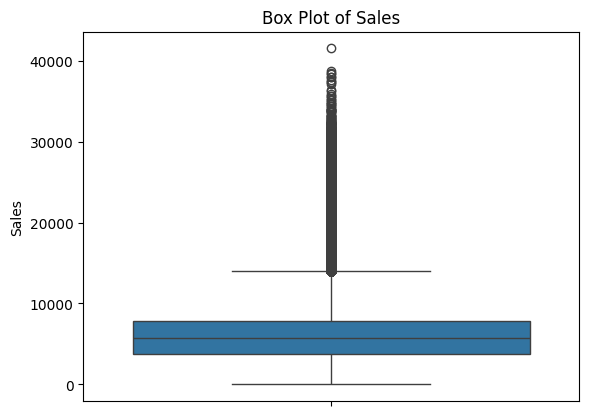

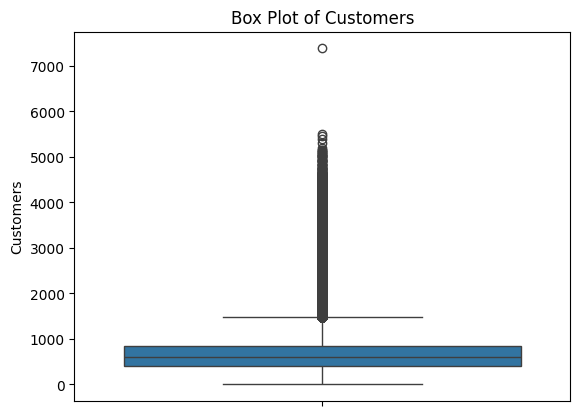

In [23]:
from scripts.preprocessing import boxPlotForDetectOutliers
boxPlotForDetectOutliers(train_data,['Sales','Customers'])


#### Detect outlier for Test Data

In [24]:
get_outlier_summary(test_data,['Id','Store','DayOfWeek'])


2024-09-23 19:11:31,896 - INFO - Calculating outlier summary for numerical columns...
2024-09-23 19:11:31,896 - INFO - Calculating outlier summary for numerical columns...


From 8 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Id,0
1,Store,0
2,DayOfWeek,0


#### Detect outlier for Store data


In [25]:
get_outlier_summary(store_data,['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear'])


2024-09-23 19:11:31,937 - INFO - Calculating outlier summary for numerical columns...
2024-09-23 19:11:31,937 - INFO - Calculating outlier summary for numerical columns...


From 10 selected numerical columns, there are 2 columns with outlier values.


,Variable,Number of Outliers
0,CompetitionDistance,110
1,CompetitionOpenSinceMonth,0
2,CompetitionOpenSinceYear,11
3,Promo2SinceWeek,0
4,Promo2SinceYear,0


### Plot outliers detected in the store data.


2024-09-23 19:11:32,142 - INFO - Creating box plots for outlier detection...
2024-09-23 19:11:32,142 - INFO - Creating box plots for outlier detection...


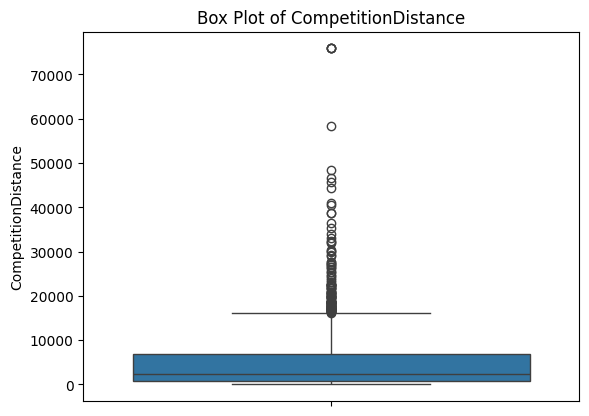

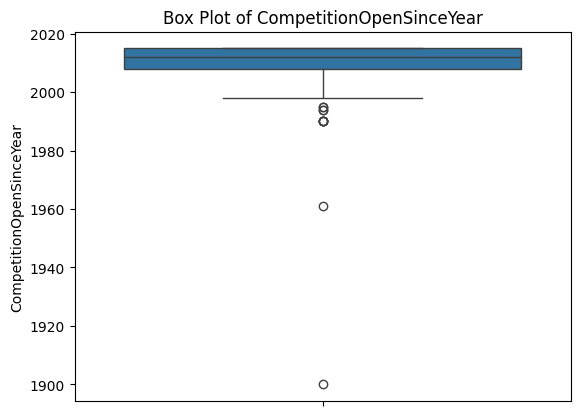

In [26]:
from scripts.preprocessing import boxPlotForDetectOutliers
boxPlotForDetectOutliers(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])


## Remove Outliers

In [27]:
from scripts.preprocessing import remove_outliers_winsorization


In [28]:
train_data = remove_outliers_winsorization(train_data,['Sales','Customers'])


2024-09-23 19:11:32,611 - INFO - Removing outliers using winsorization...
2024-09-23 19:11:32,611 - INFO - Removing outliers using winsorization...
2024-09-23 19:11:32,654 - INFO - Winsorizing column 'Sales' with lower bound: -2466.5 and upper bound: 14049.5
2024-09-23 19:11:32,654 - INFO - Winsorizing column 'Sales' with lower bound: -2466.5 and upper bound: 14049.5
2024-09-23 19:11:32,737 - INFO - Winsorizing column 'Customers' with lower bound: -243.0 and upper bound: 1485.0
2024-09-23 19:11:32,737 - INFO - Winsorizing column 'Customers' with lower bound: -243.0 and upper bound: 1485.0


In [29]:

store_data = remove_outliers_winsorization(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])


2024-09-23 19:11:32,764 - INFO - Removing outliers using winsorization...
2024-09-23 19:11:32,764 - INFO - Removing outliers using winsorization...
2024-09-23 19:11:32,769 - INFO - Winsorizing column 'CompetitionDistance' with lower bound: -8557.5 and upper bound: 16182.5
2024-09-23 19:11:32,769 - INFO - Winsorizing column 'CompetitionDistance' with lower bound: -8557.5 and upper bound: 16182.5
2024-09-23 19:11:32,776 - INFO - Winsorizing column 'CompetitionOpenSinceYear' with lower bound: 1997.5 and upper bound: 2025.5
2024-09-23 19:11:32,776 - INFO - Winsorizing column 'CompetitionOpenSinceYear' with lower bound: 1997.5 and upper bound: 2025.5


### Verify if outliers were removed

#### For Training Data

In [30]:
get_outlier_summary(train_data,['Sales','Customers'])



2024-09-23 19:11:32,920 - INFO - Calculating outlier summary for numerical columns...
2024-09-23 19:11:32,920 - INFO - Calculating outlier summary for numerical columns...


From 9 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Sales,0
1,Customers,0


#### For Test Data

In [31]:
get_outlier_summary(test_data,['Id','Store','DayOfWeek'])


2024-09-23 19:11:33,046 - INFO - Calculating outlier summary for numerical columns...
2024-09-23 19:11:33,046 - INFO - Calculating outlier summary for numerical columns...


From 8 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Id,0
1,Store,0
2,DayOfWeek,0


#### For Store Data

In [32]:
get_outlier_summary(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])


2024-09-23 19:11:33,081 - INFO - Calculating outlier summary for numerical columns...
2024-09-23 19:11:33,081 - INFO - Calculating outlier summary for numerical columns...


From 10 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,CompetitionDistance,0
1,CompetitionOpenSinceYear,0


### Box-Plot After Removing Outlier

#### For Training Data

2024-09-23 19:11:33,113 - INFO - Creating box plots for outlier detection...
2024-09-23 19:11:33,113 - INFO - Creating box plots for outlier detection...


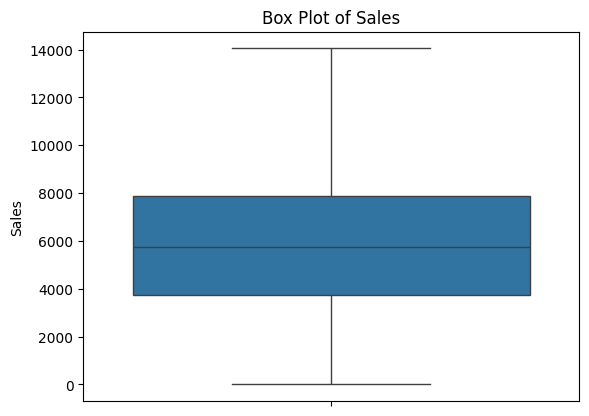

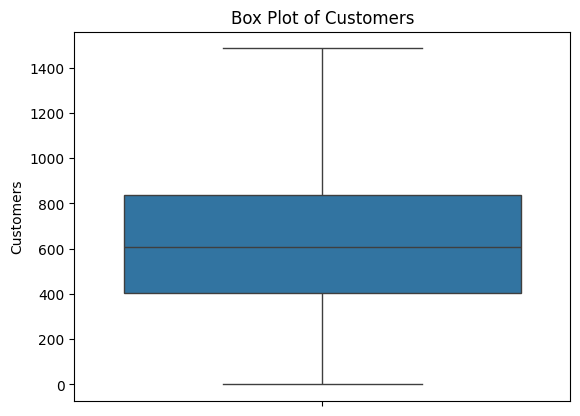

In [33]:
from scripts.preprocessing import boxPlotForDetectOutliers
boxPlotForDetectOutliers(train_data,['Sales','Customers'])



#### For Store Date

2024-09-23 19:11:39,016 - INFO - Creating box plots for outlier detection...
2024-09-23 19:11:39,016 - INFO - Creating box plots for outlier detection...


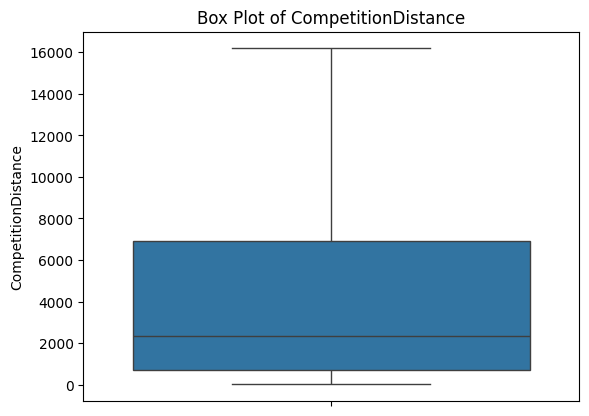

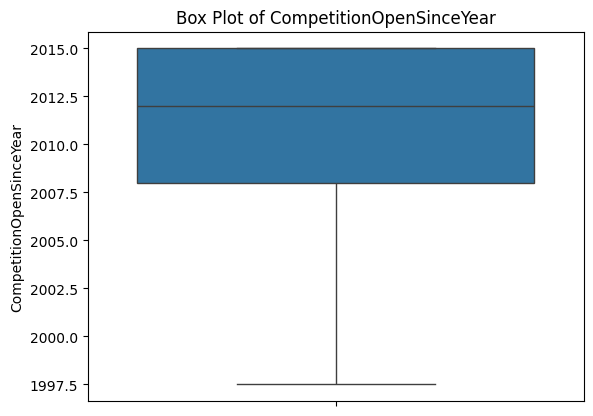

In [34]:
from scripts.preprocessing import boxPlotForDetectOutliers
boxPlotForDetectOutliers(store_data,['CompetitionDistance','CompetitionOpenSinceYear'])


# Merge Training And Test With Store Dataset


In [35]:

merged_train_data_store = pd.merge(train_data, store_data, on='Store', how='inner')
merged_test_data_store = pd.merge(test_data, store_data, on='Store', how='inner')



In [36]:
merged_train_data_store.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263.0,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064.0,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314.0,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995.0,1485,1,1,0,1,c,c,620.0,9.0,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822.0,559,1,1,0,1,a,a,16182.5,4.0,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"


In [37]:
merged_train_data_store.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  float64
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [38]:
merged_test_data_store.head()


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,16182.5,4.0,2013.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"


In [39]:
merged_test_data_store.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41088 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        41088 non-null  float64
 11  CompetitionOpenSinceMonth  41088 non-null  float64
 12  CompetitionOpenSinceYear   41088 non-null  float64
 13  Promo2                     41088 non-null  int

#### State Holiday a = Public Holiday, b = Easter Holiday, c = Christmas 0= None

In [40]:
from scripts.feature_engineering import replace_char_state_holiday


In [41]:
merged_train_data_store['StateHoliday'] = merged_train_data_store['StateHoliday'].apply(replace_char_state_holiday)


#### Assortment level a = basic, b = extra, c = extended

In [42]:
from scripts.feature_engineering import replace_char_assortment


In [43]:
merged_train_data_store['Assortment'] = merged_train_data_store['Assortment'].apply(replace_char_assortment)
merged_train_data_store['Assortment'].value_counts()


Assortment
basic       537445
extended    471470
extra         8294
Name: count, dtype: int64

In [44]:
merged_train_data_store['Date'] = pd.to_datetime(merged_train_data_store['Date'])


In [45]:
from scripts.feature_engineering import create_date_features


In [46]:
create_date_features(merged_train_data_store)


2024-09-23 19:11:41,803 - INFO - Creating date features.
2024-09-23 19:11:41,803 - INFO - Creating date features.


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,IsWeekend
0,1,5,2015-07-31,5263.0,555,1,1,Non Holiday,1,c,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
1,2,5,2015-07-31,6064.0,625,1,1,Non Holiday,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
2,3,5,2015-07-31,8314.0,821,1,1,Non Holiday,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
3,4,5,2015-07-31,13995.0,1485,1,1,Non Holiday,1,c,...,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
4,5,5,2015-07-31,4822.0,559,1,1,Non Holiday,1,a,...,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2015,7,31,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0.0,0,0,0,Public Holiday,1,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0
1017205,1112,2,2013-01-01,0.0,0,0,0,Public Holiday,1,c,...,2006.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0
1017206,1113,2,2013-01-01,0.0,0,0,0,Public Holiday,1,a,...,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0
1017207,1114,2,2013-01-01,0.0,0,0,0,Public Holiday,1,a,...,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0


In [47]:
merged_train_data_store.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'IsWeekend'],
      dtype='object')

### Distribution of promotions in both datasets

In [48]:
from scripts.feature_engineering import distribution_promotions_in_both_datasets


2024-09-23 19:11:43,275 - INFO - Comparing Promo distribution between train and test datasets.
2024-09-23 19:11:43,275 - INFO - Comparing Promo distribution between train and test datasets.
2024-09-23 19:11:43,318 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-23 19:11:43,318 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-23 19:11:43,330 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-23 19:11:43,330 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings

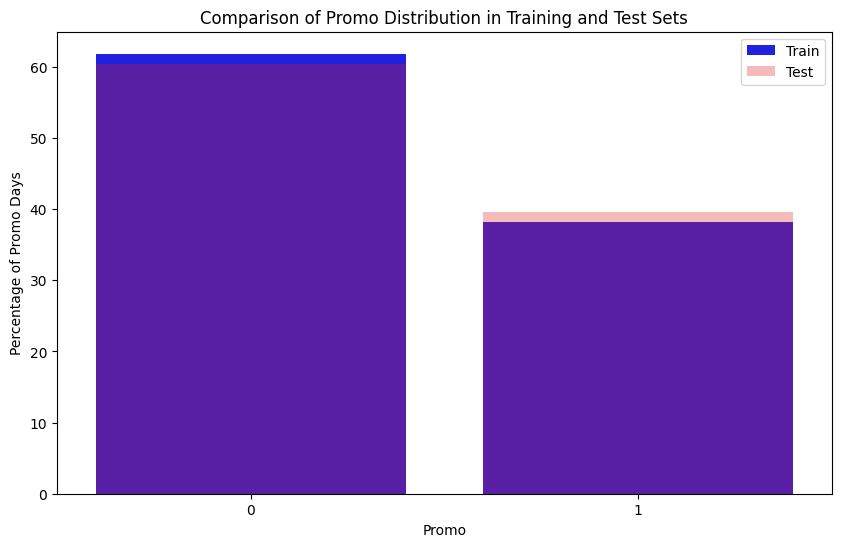

In [49]:
distribution_promotions_in_both_datasets(merged_train_data_store,merged_test_data_store)


### Check & compare sales behavior before, during, and after holidays

### Categorize each day based on the holiday type

In [50]:
from scripts.feature_engineering import categorizeEachDayBasedonHolidayType
merged_train_data_store = categorizeEachDayBasedonHolidayType(merged_train_data_store)


2024-09-23 19:11:43,629 - INFO - Categorizing each day based on holiday type.
2024-09-23 19:11:43,629 - INFO - Categorizing each day based on holiday type.


In [51]:
merged_train_data_store.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,BeforeHoliday_Public Holiday,SalesPeriod_Public Holiday,HolidayPeriod_Easter Holiday,AfterHoliday_Easter Holiday,BeforeHoliday_Easter Holiday,SalesPeriod_Easter Holiday,HolidayPeriod_Christmas,AfterHoliday_Christmas,BeforeHoliday_Christmas,SalesPeriod_Christmas
0,1,5,2015-07-31,5263.0,555,1,1,Non Holiday,1,c,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
1,2,5,2015-07-31,6064.0,625,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
2,3,5,2015-07-31,8314.0,821,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
3,4,5,2015-07-31,13995.0,1485,1,1,Non Holiday,1,c,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
4,5,5,2015-07-31,4822.0,559,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular


### Calculate average sales during different periods (Before, During, After)

In [52]:
from scripts.feature_engineering import calculateAverageSalesDuringDifferentPeriods
holiday_sales_behavior = calculateAverageSalesDuringDifferentPeriods(merged_train_data_store)


2024-09-23 19:12:23,450 - INFO - Calculating average sales during different periods.
2024-09-23 19:12:23,450 - INFO - Calculating average sales during different periods.


### Sales Behavior Before, During, and After Different Holidays

2024-09-23 19:12:23,782 - INFO - Plotting the effect of holidays on sales.
2024-09-23 19:12:23,782 - INFO - Plotting the effect of holidays on sales.


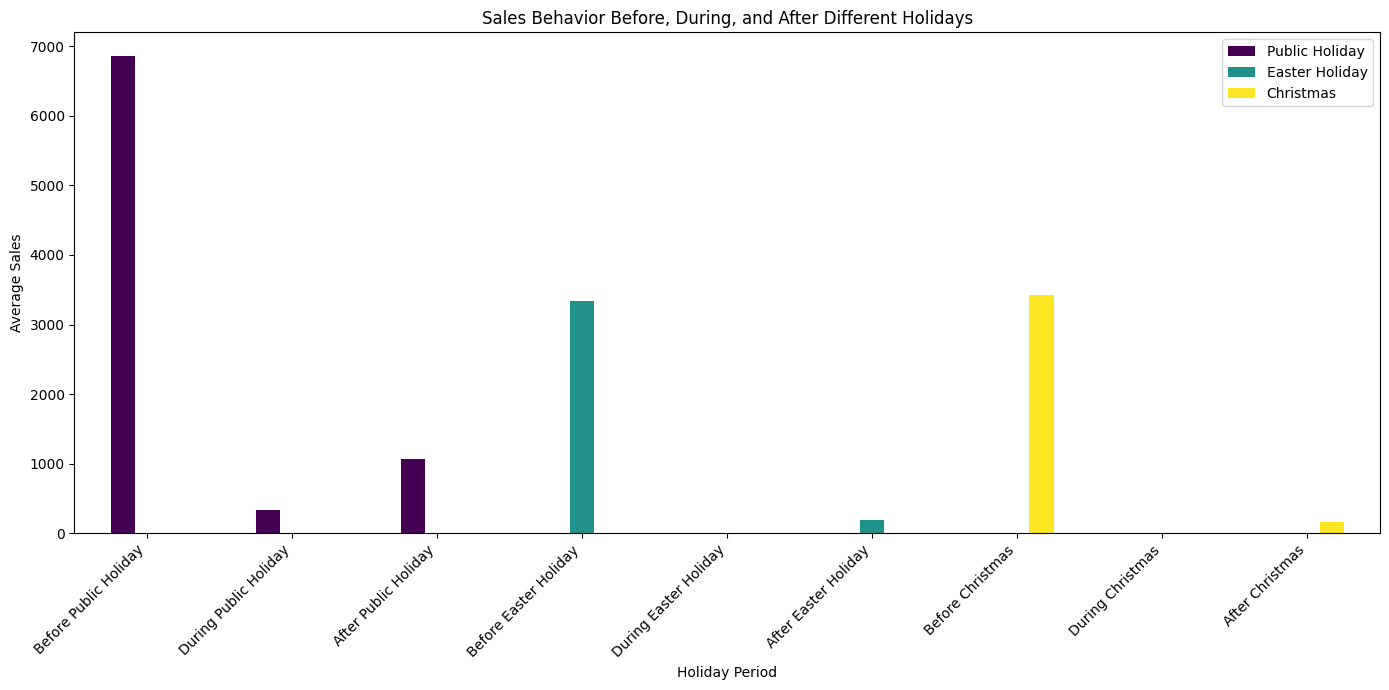

In [53]:
from scripts.feature_engineering import plotEffectOfHolidayOnSales
plotEffectOfHolidayOnSales(holiday_sales_behavior)


In [54]:
merged_train_data_store.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,BeforeHoliday_Public Holiday,SalesPeriod_Public Holiday,HolidayPeriod_Easter Holiday,AfterHoliday_Easter Holiday,BeforeHoliday_Easter Holiday,SalesPeriod_Easter Holiday,HolidayPeriod_Christmas,AfterHoliday_Christmas,BeforeHoliday_Christmas,SalesPeriod_Christmas
0,1,5,2015-07-31,5263.0,555,1,1,Non Holiday,1,c,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
1,2,5,2015-07-31,6064.0,625,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
2,3,5,2015-07-31,8314.0,821,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
3,4,5,2015-07-31,13995.0,1485,1,1,Non Holiday,1,c,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
4,5,5,2015-07-31,4822.0,559,1,1,Non Holiday,1,a,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular


### Sales Over Time on Weekly, Monthly and Yearly

In [55]:
merged_train_data_store.set_index('Date', inplace=True)


In [56]:
merged_train_data_store.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,BeforeHoliday_Public Holiday,SalesPeriod_Public Holiday,HolidayPeriod_Easter Holiday,AfterHoliday_Easter Holiday,BeforeHoliday_Easter Holiday,SalesPeriod_Easter Holiday,HolidayPeriod_Christmas,AfterHoliday_Christmas,BeforeHoliday_Christmas,SalesPeriod_Christmas
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263.0,555,1,1,Non Holiday,1,c,basic,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
2015-07-31,2,5,6064.0,625,1,1,Non Holiday,1,a,basic,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
2015-07-31,3,5,8314.0,821,1,1,Non Holiday,1,a,basic,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
2015-07-31,4,5,13995.0,1485,1,1,Non Holiday,1,c,extended,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular
2015-07-31,5,5,4822.0,559,1,1,Non Holiday,1,a,basic,...,False,Regular,Regular,False,False,Regular,Regular,False,False,Regular


2024-09-23 19:12:24,374 - INFO - Plotting sales over time by different timeframes.
2024-09-23 19:12:24,374 - INFO - Plotting sales over time by different timeframes.


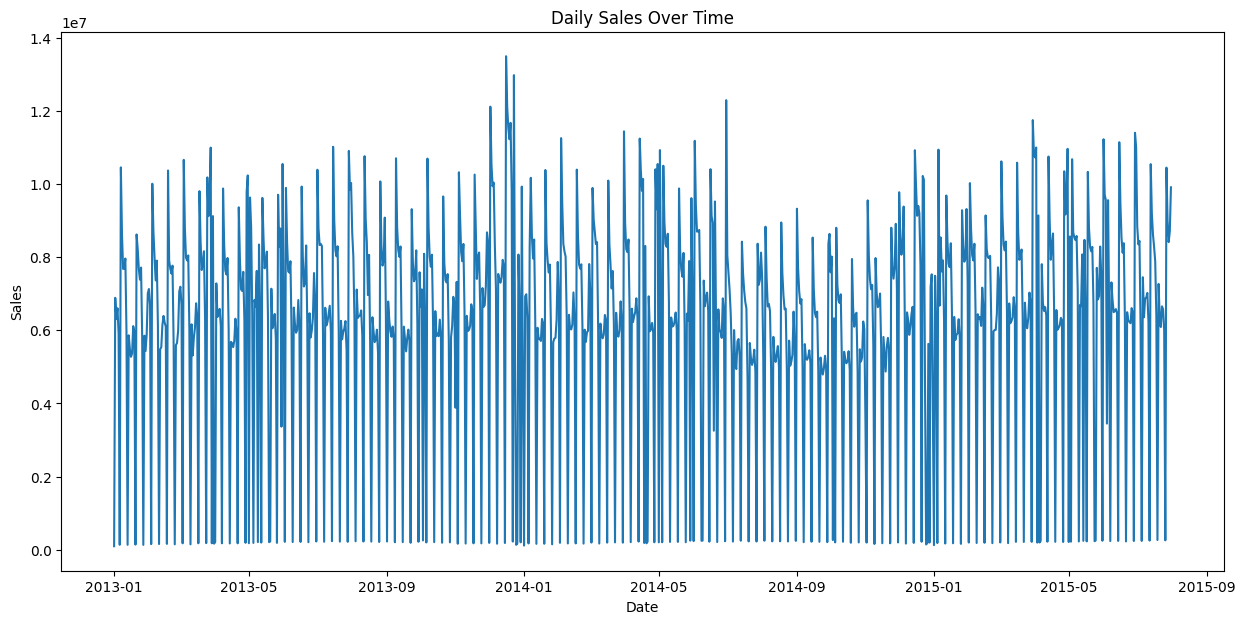

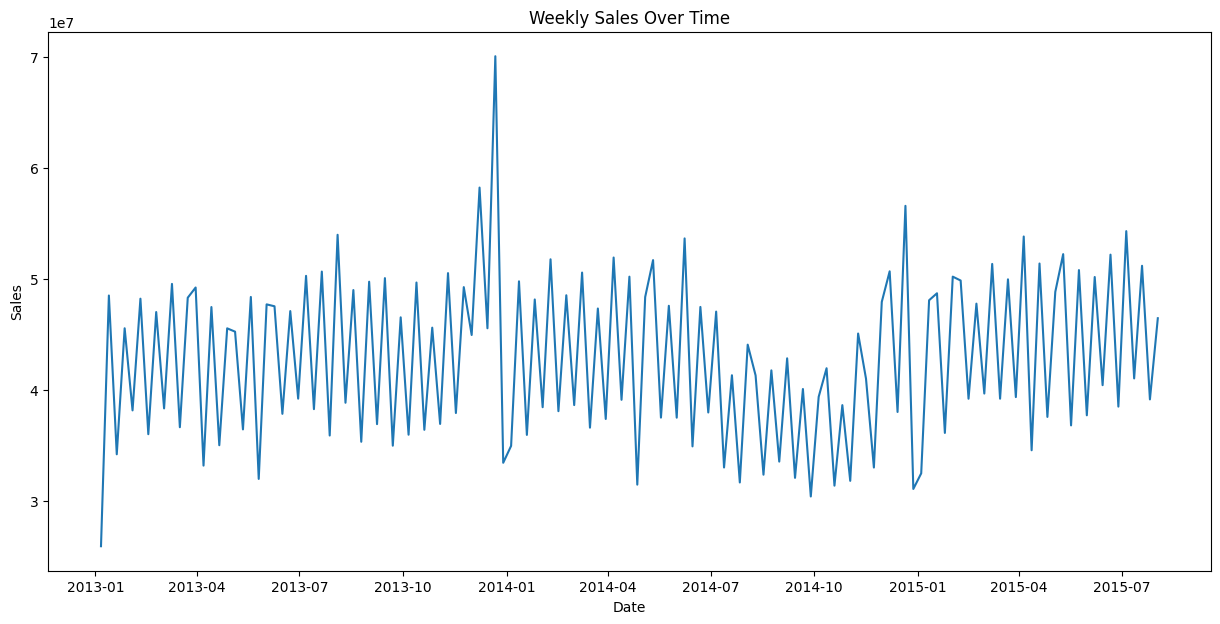

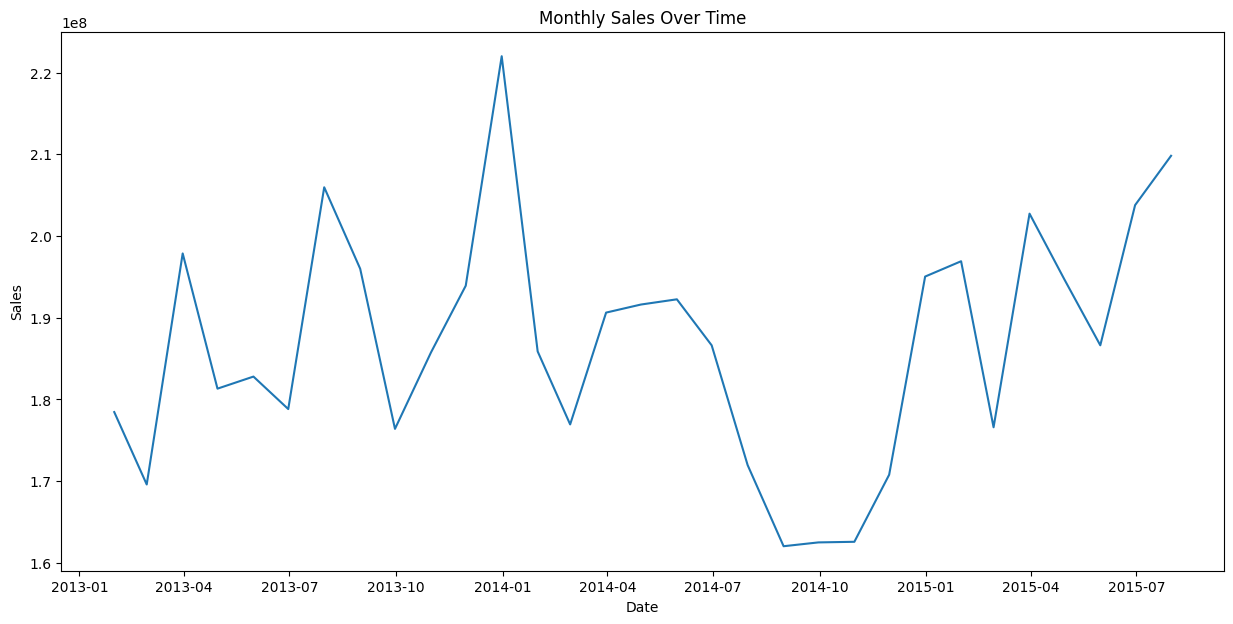

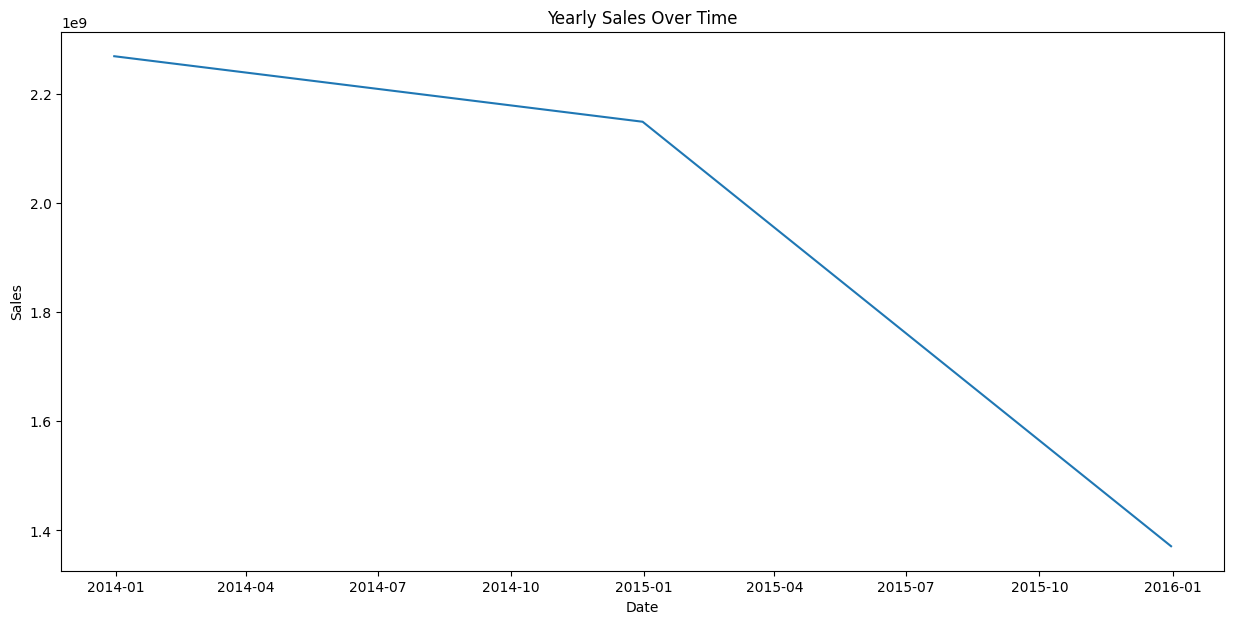

In [57]:
from scripts.feature_engineering import salesOverTime
salesOverTime(merged_train_data_store)


# Seasonal Decompose

### Trend: 
This component shows the long-term movement in the data. It indicates whether sales are generally increasing, decreasing, or remaining stable over time.
### Seasonal: 
This component captures the repetitive patterns or fluctuations that occur at regular intervals (e.g., monthly, quarterly). It reveals how sales vary throughout the year, highlighting any seasonal effects.
### Residual (or Irregular): 
This component represents the random noise or leftover variation after removing the trend and seasonal components. It can indicate anomalies or outliers in the data.
Overall, the results help in understanding the underlying patterns in the sales data, which can inform business decisions and forecasting efforts.

2024-09-23 19:12:26,656 - INFO - Decomposing sales seasonality.
2024-09-23 19:12:26,656 - INFO - Decomposing sales seasonality.


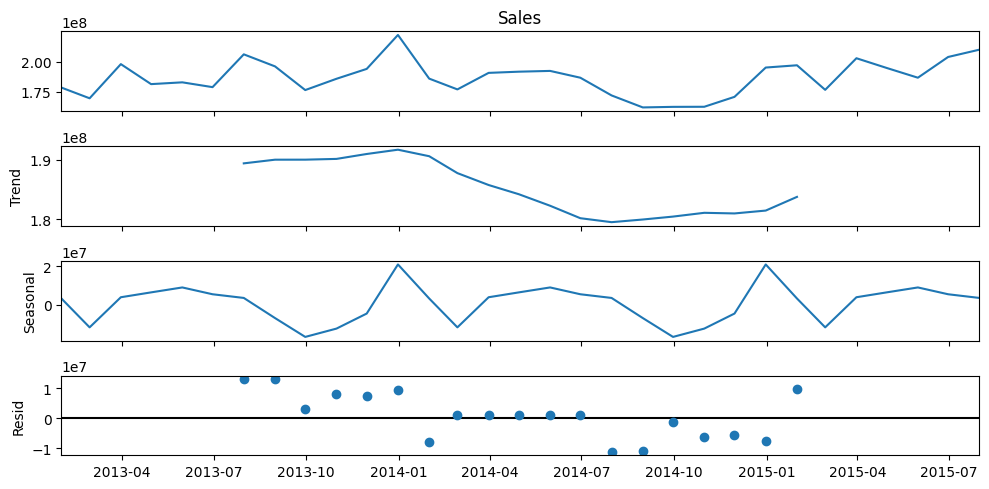

In [58]:
from scripts.feature_engineering import salesSeasonalDecompose
salesSeasonalDecompose(merged_train_data_store)


### Day of week patterns

### Average sales by day of the week

2024-09-23 19:12:29,078 - INFO - Calculating average sales by day of the week.
2024-09-23 19:12:29,078 - INFO - Calculating average sales by day of the week.


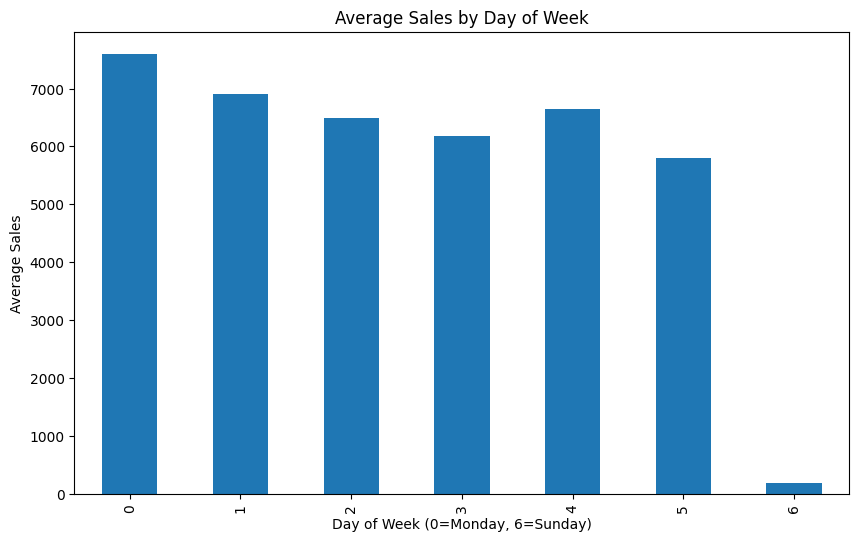

In [59]:
from scripts.feature_engineering import averageSalesDayOfWeek
averageSalesDayOfWeek(merged_train_data_store)


### Visualize distribution of Holiday

In [60]:
merged_train_data_store['StateHoliday'].value_counts()


StateHoliday
Non Holiday       986159
Public Holiday     20260
Easter Holiday      6690
Christmas           4100
Name: count, dtype: int64

In [61]:
merged_train_data_store['SchoolHoliday'].value_counts()


SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

In [62]:
monthly_open_store = merged_train_data_store.groupby([merged_train_data_store.index.to_period('M'), 'Open'])['Sales'].mean().unstack()


In [63]:
monthly_open_store.head()


Open,0,1
Date,,
2013-01,0.0,6181.368250
2013-02,0.0,6355.652475
2013-03,0.0,7093.965994
2013-04,0.0,6503.426722
2013-05,0.0,6976.285875


### Trends of customer behavior during store opening and closing times


#### Sales with respect to Open and not open

2024-09-23 19:12:29,727 - INFO - Plotting monthly sales: Open vs Not Open.
2024-09-23 19:12:29,727 - INFO - Plotting monthly sales: Open vs Not Open.


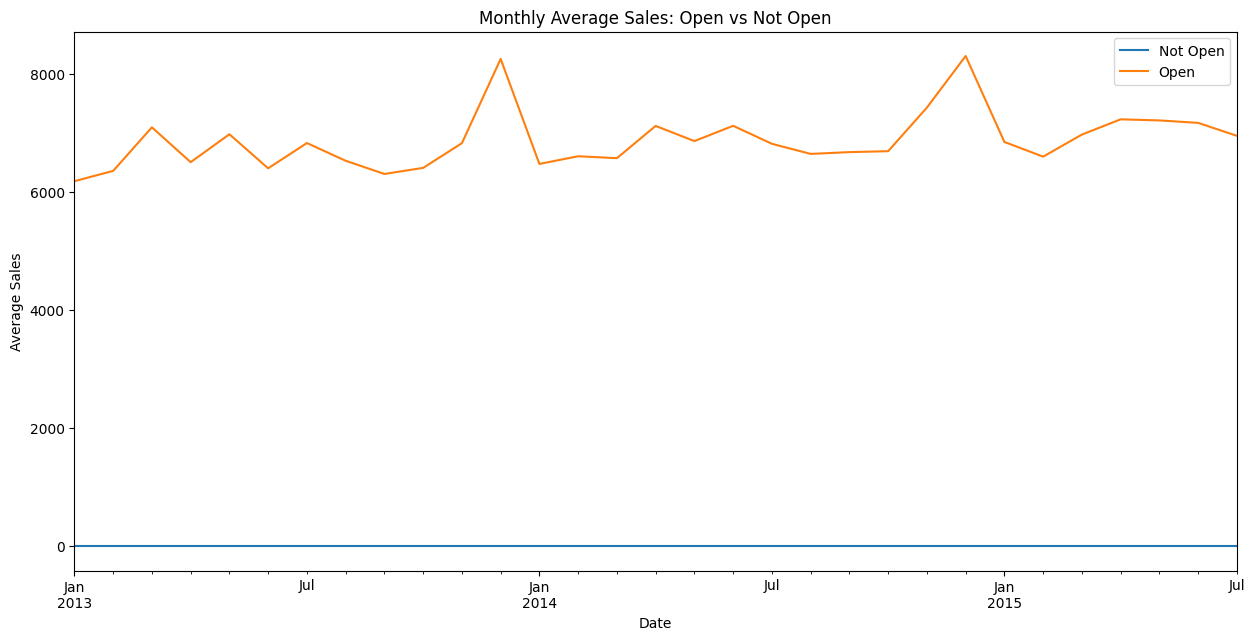

In [64]:
from scripts.feature_engineering import salesWithOpenAndClose
salesWithOpenAndClose(monthly_open_store)


#### Trends of customer behavior during store opening and closing times


#### Customer behavior during store open

2024-09-23 19:12:30,195 - INFO - Analyzing customer behavior for stores that are open.
2024-09-23 19:12:30,195 - INFO - Analyzing customer behavior for stores that are open.


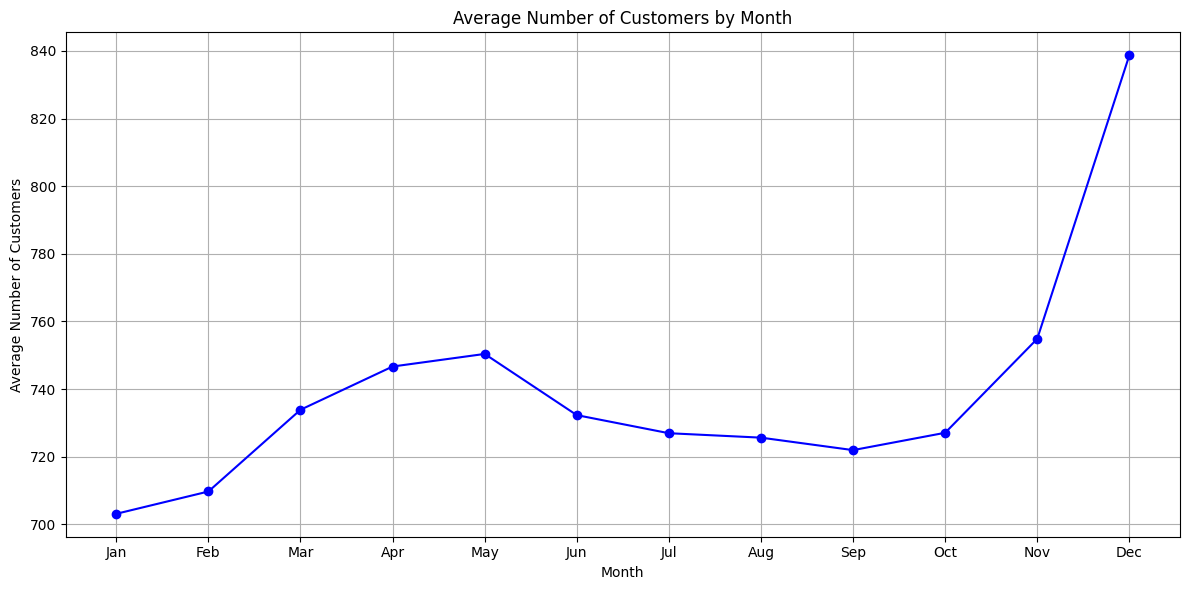

In [65]:
from scripts.feature_engineering import customerBehaviorStoreOpen
customerBehaviorStoreOpen(merged_train_data_store)



#### Customer behavior during store not open

In [66]:
merged_train_data_store.reset_index(inplace=True)


2024-09-23 19:12:30,934 - INFO - Analyzing customer behavior for stores that are not open.
2024-09-23 19:12:30,934 - INFO - Analyzing customer behavior for stores that are not open.


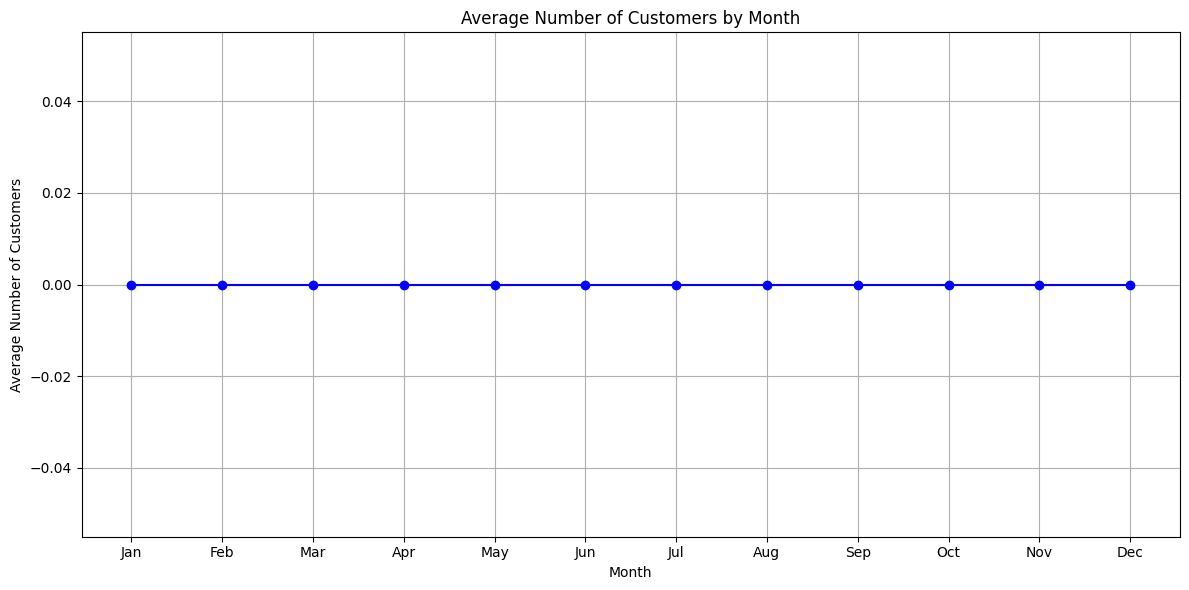

In [67]:
from scripts.feature_engineering import customerBehaviorStoreNotOpen
customerBehaviorStoreNotOpen(merged_train_data_store)


#### Customer behavior during store open seasonal

#### Categorize month into seasonals (winter, spring, summer, fall)

2024-09-23 19:12:31,416 - INFO - Analyzing customer behavior by season for stores that are open.
2024-09-23 19:12:31,416 - INFO - Analyzing customer behavior by season for stores that are open.


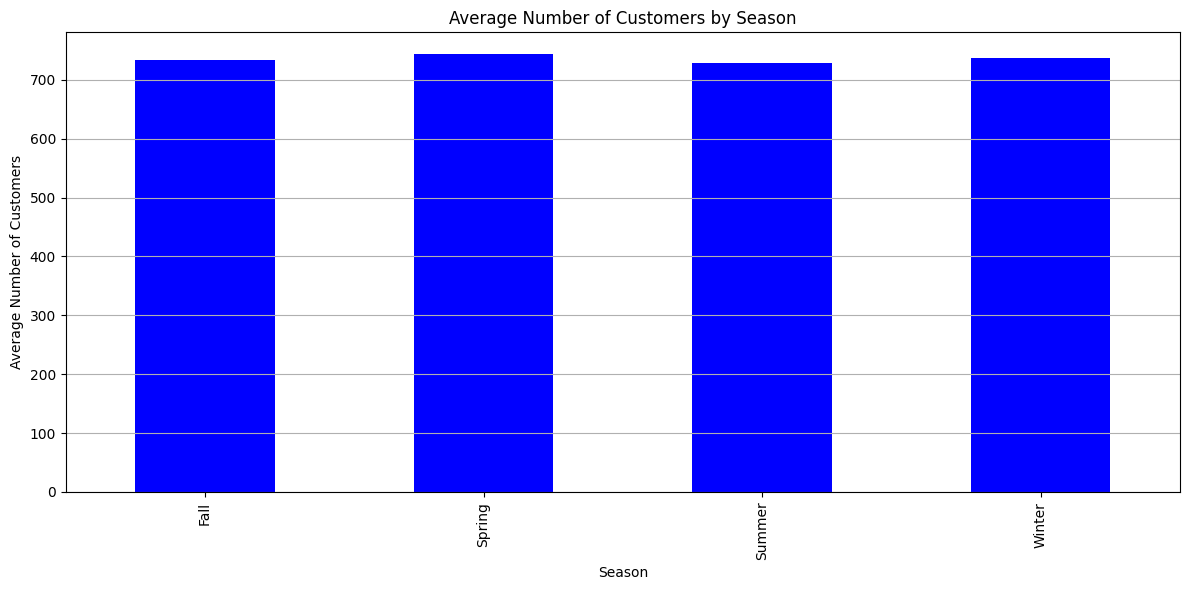

In [68]:
from scripts.feature_engineering import customerBehaviorStoreOpenSeasonal
customerBehaviorStoreOpenSeasonal(merged_train_data_store)


### Distribution of State Holiday

#### Number of State Holiday and Not Holiday

2024-09-23 19:12:32,567 - INFO - Plotting distribution of State Holidays.
2024-09-23 19:12:32,567 - INFO - Plotting distribution of State Holidays.


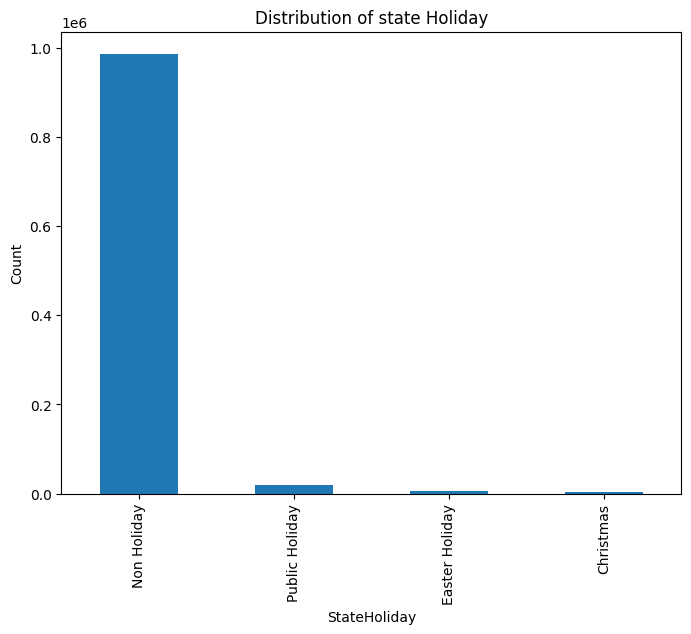

In [69]:
from scripts.feature_engineering import numberStateHolidayAndNotHoliday
numberStateHolidayAndNotHoliday(merged_train_data_store)


### Distribution of School Holiday

2024-09-23 19:12:32,886 - INFO - Plotting distribution of School Holidays.
2024-09-23 19:12:32,886 - INFO - Plotting distribution of School Holidays.


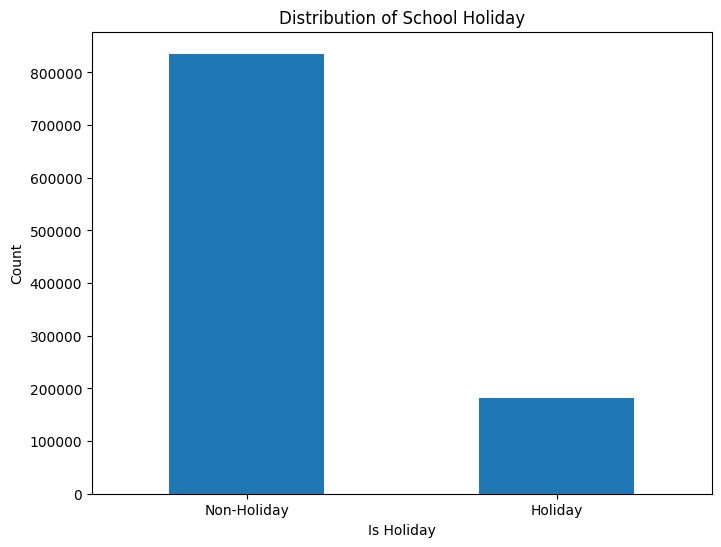

In [70]:
from scripts.feature_engineering import numberSchoolHolidayAndNotHoliday
numberSchoolHolidayAndNotHoliday(merged_train_data_store)


#### Average Sales on State Holiday and Not Holiday

2024-09-23 19:12:33,128 - INFO - Plotting average sales on State Holidays vs Non-Holidays.
2024-09-23 19:12:33,128 - INFO - Plotting average sales on State Holidays vs Non-Holidays.


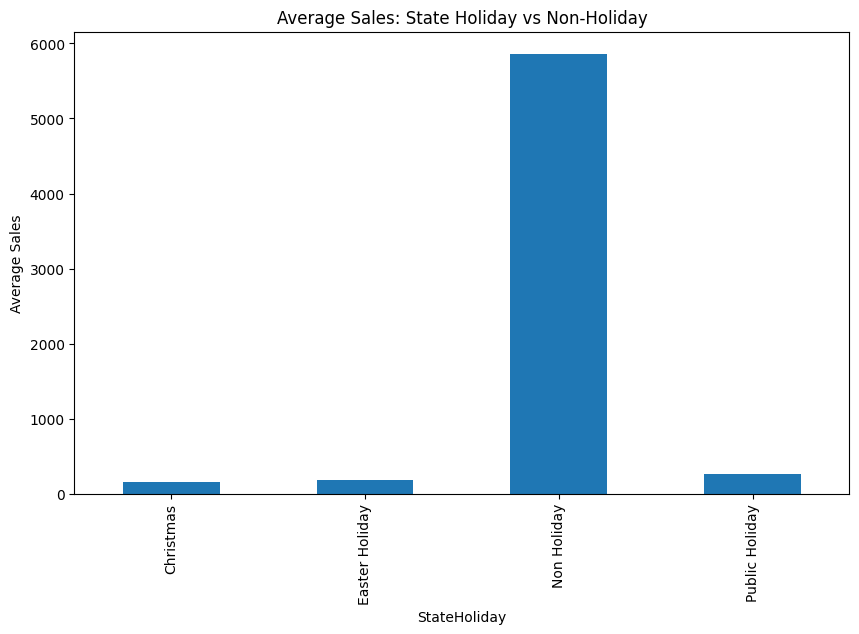

In [71]:
from scripts.feature_engineering import averageSalesOnStateHoliday
averageSalesOnStateHoliday(merged_train_data_store)


#### Average Sales on School Holiday and Not Holiday

2024-09-23 19:12:33,492 - INFO - Plotting average sales on School Holidays vs Non-Holidays.
2024-09-23 19:12:33,492 - INFO - Plotting average sales on School Holidays vs Non-Holidays.


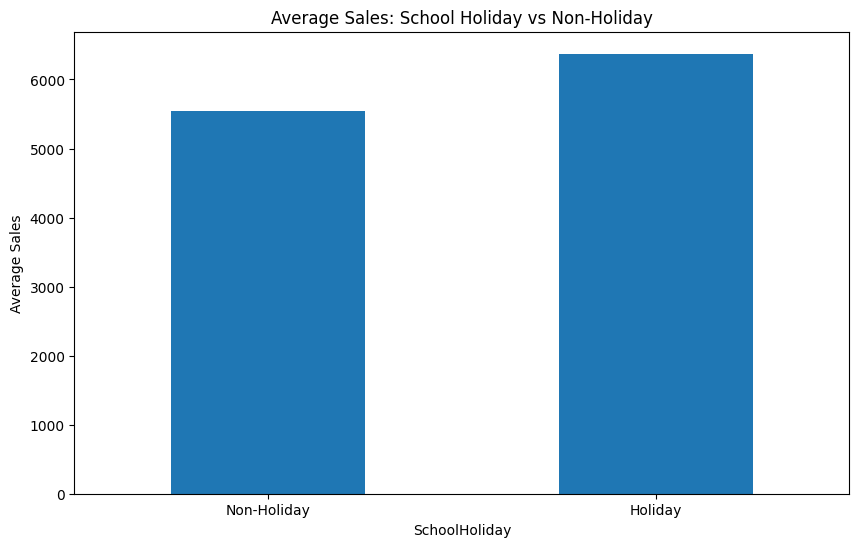

In [72]:
from scripts.feature_engineering import averageSalesOnSchoolHoliday
averageSalesOnSchoolHoliday(merged_train_data_store)


### Promotion effect over time

In [73]:
merged_train_data_store.set_index('Date',inplace=True)


In [74]:
monthly_promo_sales = merged_train_data_store.groupby([merged_train_data_store.index.to_period('M'), 'Promo'])['Sales'].mean().unstack()


In [75]:
monthly_promo_sales.head()


Promo,0,1
Date,,
2013-01,4117.199154,7358.728161
2013-02,4301.514674,7466.948475
2013-03,4071.467881,7487.588191
2013-04,4027.505531,7509.977653
2013-05,4067.865695,6978.308244


## promo affect on sales

2024-09-23 19:12:34,050 - INFO - Plotting effect of promotions on monthly average sales.
2024-09-23 19:12:34,050 - INFO - Plotting effect of promotions on monthly average sales.


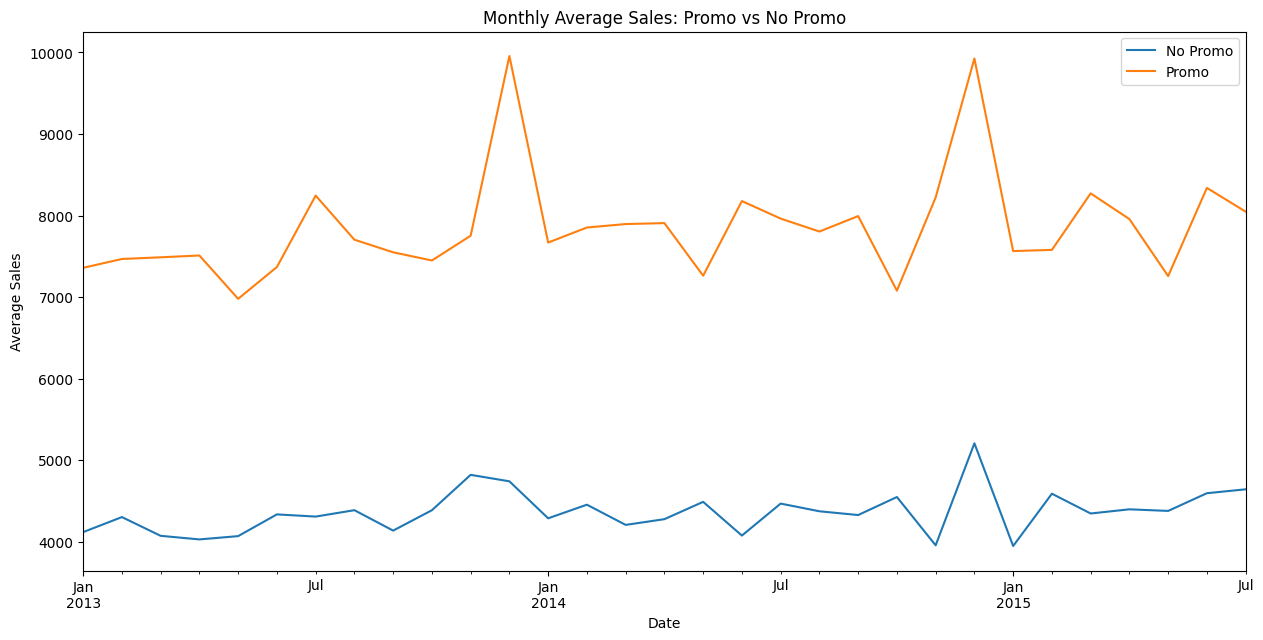

In [76]:
from scripts.feature_engineering import promotionEffectSales
promotionEffectSales(monthly_promo_sales)


In [77]:
merged_train_data_store.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,SalesPeriod_Public Holiday,HolidayPeriod_Easter Holiday,AfterHoliday_Easter Holiday,BeforeHoliday_Easter Holiday,SalesPeriod_Easter Holiday,HolidayPeriod_Christmas,AfterHoliday_Christmas,BeforeHoliday_Christmas,SalesPeriod_Christmas,Season
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,4,5263.0,555,1,1,Non Holiday,1,c,basic,...,Regular,Regular,False,False,Regular,Regular,False,False,Regular,Summer
2015-07-31,2,4,6064.0,625,1,1,Non Holiday,1,a,basic,...,Regular,Regular,False,False,Regular,Regular,False,False,Regular,Summer
2015-07-31,3,4,8314.0,821,1,1,Non Holiday,1,a,basic,...,Regular,Regular,False,False,Regular,Regular,False,False,Regular,Summer
2015-07-31,4,4,13995.0,1485,1,1,Non Holiday,1,c,extended,...,Regular,Regular,False,False,Regular,Regular,False,False,Regular,Summer
2015-07-31,5,4,4822.0,559,1,1,Non Holiday,1,a,basic,...,Regular,Regular,False,False,Regular,Regular,False,False,Regular,Summer


## Store type performance over time

2024-09-23 19:12:34,497 - INFO - Analyzing store type performance over time.
2024-09-23 19:12:34,497 - INFO - Analyzing store type performance over time.


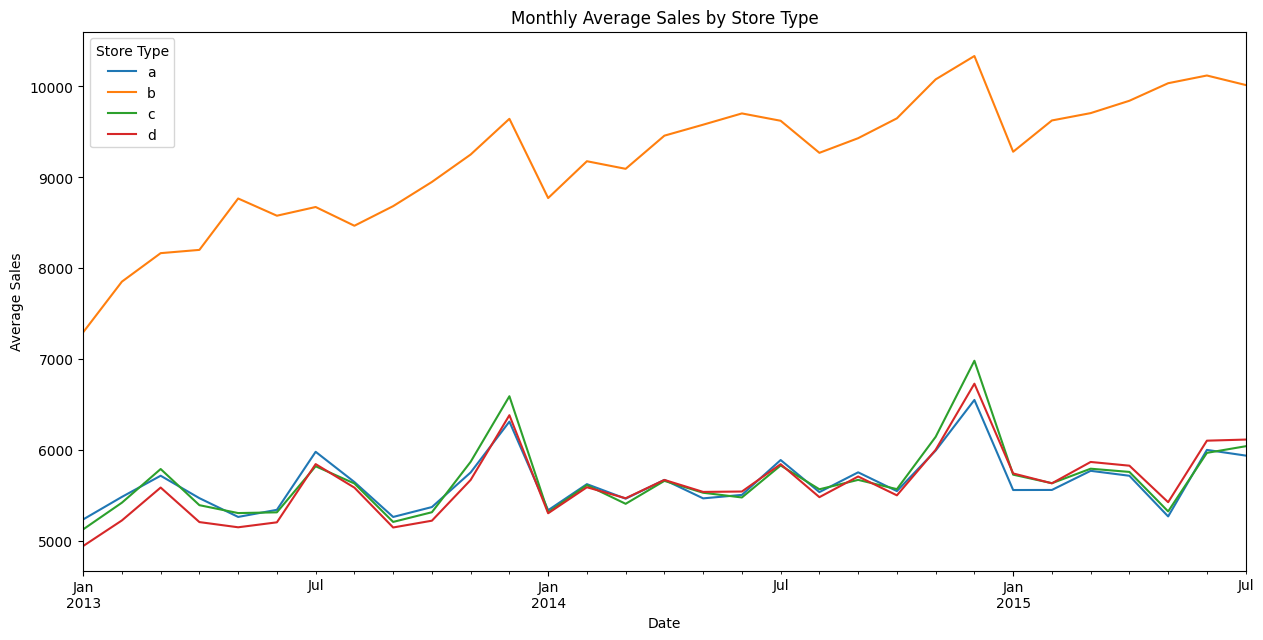

In [78]:
from scripts.feature_engineering import storeTypePerformanceOverTime
store_type_sales=storeTypePerformanceOverTime(merged_train_data_store)


In [79]:
merged_store_type_prome = pd.merge(monthly_promo_sales, store_type_sales, on='Date', how='inner')


In [80]:
merged_store_type_prome.head()


,0,1,a,b,c,d
Date,,,,,,
2013-01,4117.199154,7358.728161,5237.220513,7294.836812,5127.998692,4944.986188
2013-02,4301.514674,7466.948475,5485.177771,7852.097689,5421.533784,5226.322250
2013-03,4071.467881,7487.588191,5717.865556,8165.326376,5791.676765,5587.945171
2013-04,4027.505531,7509.977653,5471.197342,8201.215686,5394.063288,5208.185057
2013-05,4067.865695,6978.308244,5264.910353,8766.324478,5307.313753,5151.008250


2024-09-23 19:12:35,157 - INFO - Plotting performance by store type and promotion over time.
2024-09-23 19:12:35,157 - INFO - Plotting performance by store type and promotion over time.


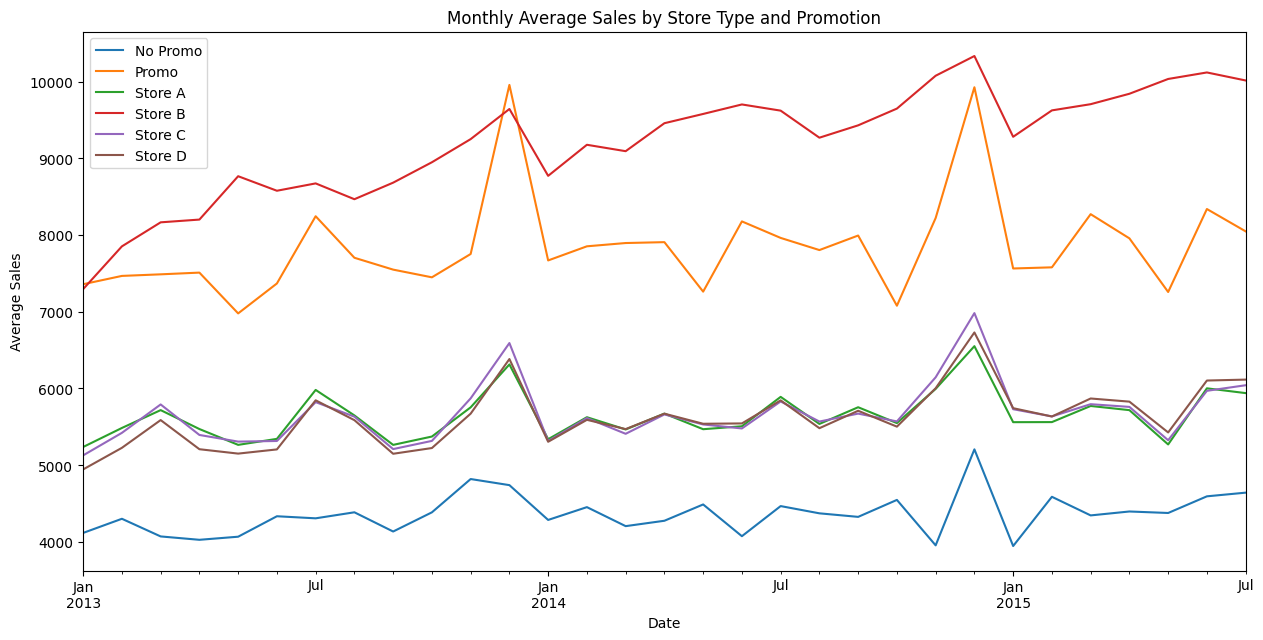

In [81]:
from scripts.feature_engineering import storeTypeAndPromoOverTime
storeTypeAndPromoOverTime(merged_store_type_prome)


### Effect Of Number of Customers on Sales

2024-09-23 19:12:35,668 - INFO - Plotting the relationship between number of customers and sales over time.
2024-09-23 19:12:35,668 - INFO - Plotting the relationship between number of customers and sales over time.


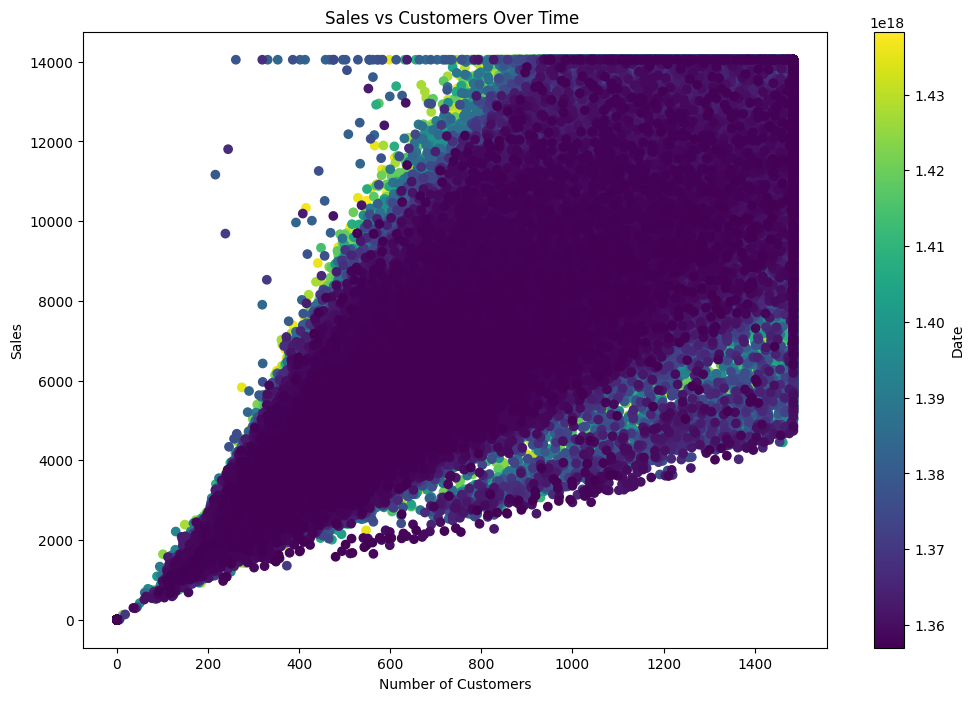

In [82]:
from scripts.feature_engineering import numberOfCustomerWithSales
numberOfCustomerWithSales(merged_train_data_store)


## Correlation Between Sales by day of week and month

2024-09-23 19:13:05,720 - INFO - Creating a heatmap for average sales by day of the week and month.
2024-09-23 19:13:05,720 - INFO - Creating a heatmap for average sales by day of the week and month.


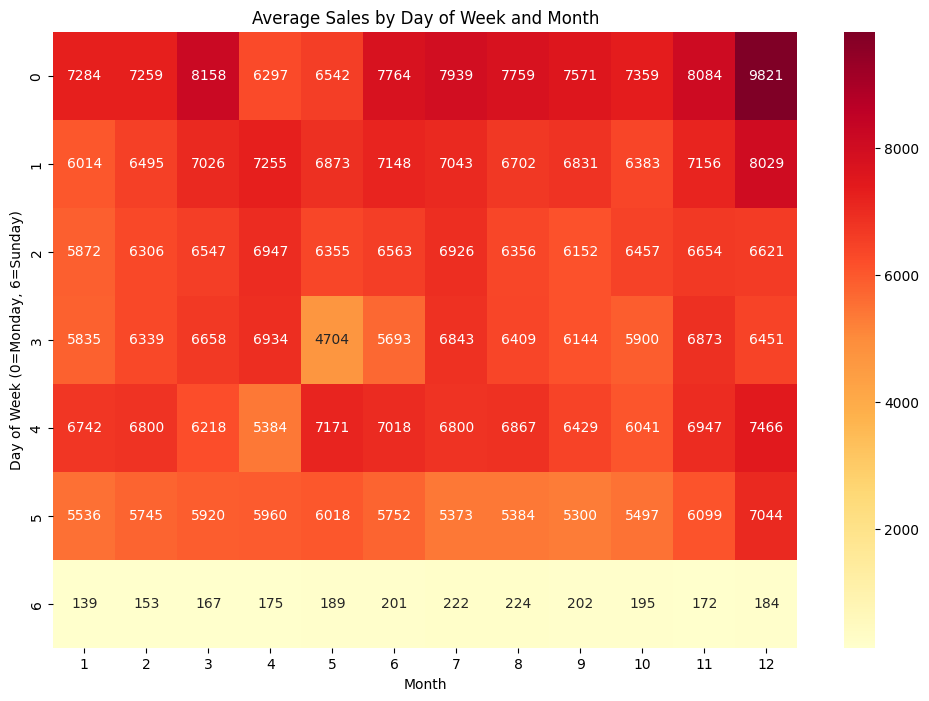

In [83]:
from scripts.feature_engineering import corrSalesByDayOfWeekAndMonth
corrSalesByDayOfWeekAndMonth(merged_train_data_store)


### Daily Sales growth rate

2024-09-23 19:13:06,519 - INFO - Plotting daily sales growth rate.
2024-09-23 19:13:06,519 - INFO - Plotting daily sales growth rate.


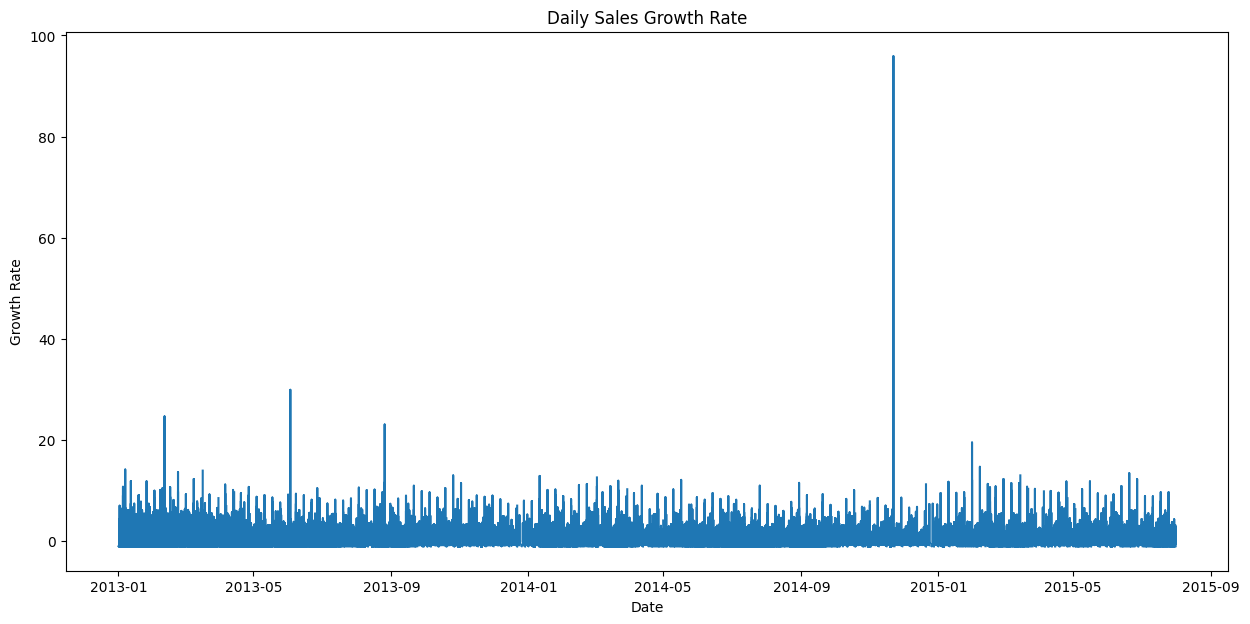

In [84]:
from scripts.feature_engineering import dailySalesGrowthRate
dailySalesGrowthRate(merged_train_data_store)


In [85]:
monthly_effect_assortment_type = merged_train_data_store.groupby([merged_train_data_store.index.to_period('M'), 'Assortment'])['Sales'].mean().unstack()


### How the assortment type affects sales

2024-09-23 19:13:07,327 - INFO - Analyzing the effect of assortment type on monthly average sales.
2024-09-23 19:13:07,327 - INFO - Analyzing the effect of assortment type on monthly average sales.


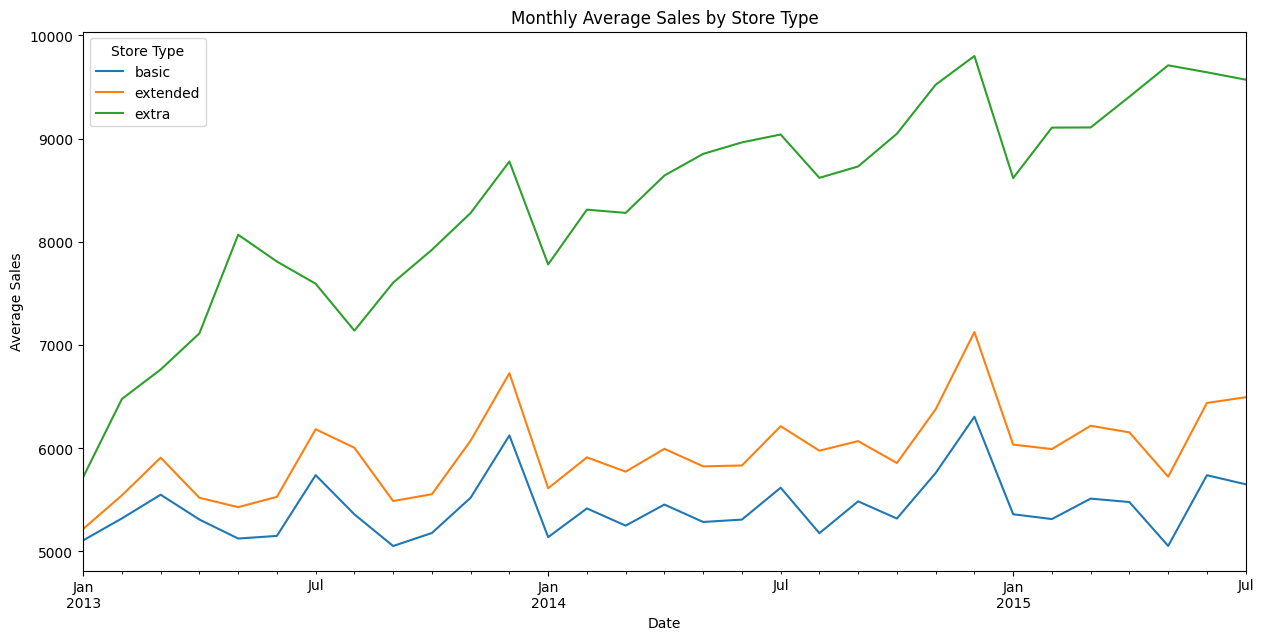

In [86]:
from scripts.feature_engineering import effectAssortmentTypeOnSales
effectAssortmentTypeOnSales(monthly_effect_assortment_type)


### Distance to the next competitor affect sales

In [87]:
from scripts.feature_engineering import effectCompetitionDistanceOnSales


2024-09-23 19:13:07,870 - INFO - Analyzing the effect of competition distance on sales.
2024-09-23 19:13:07,870 - INFO - Analyzing the effect of competition distance on sales.


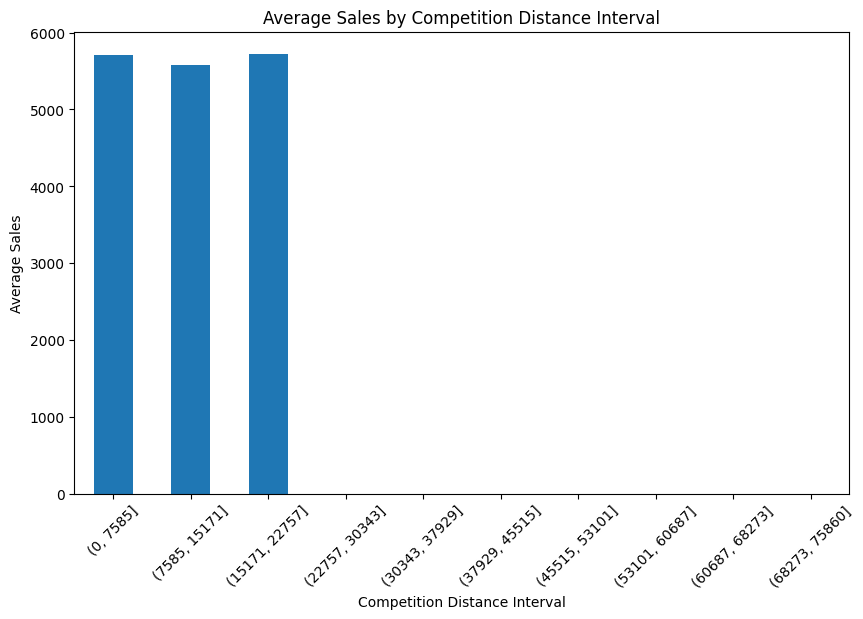

In [88]:
effectCompetitionDistanceOnSales(merged_train_data_store)


In [89]:
merged_train_data_store.reset_index(inplace=True)


In [90]:
merged_train_data_store.head()


,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,AfterHoliday_Easter Holiday,BeforeHoliday_Easter Holiday,SalesPeriod_Easter Holiday,HolidayPeriod_Christmas,AfterHoliday_Christmas,BeforeHoliday_Christmas,SalesPeriod_Christmas,Season,SalesGrowthRate,CompetitionDistanceInterval
0,2015-07-31,1,4,5263.0,555,1,1,Non Holiday,1,c,...,False,False,Regular,Regular,False,False,Regular,Summer,NaN,"(0, 7585]"
1,2015-07-31,2,4,6064.0,625,1,1,Non Holiday,1,a,...,False,False,Regular,Regular,False,False,Regular,Summer,0.152195,"(0, 7585]"
2,2015-07-31,3,4,8314.0,821,1,1,Non Holiday,1,a,...,False,False,Regular,Regular,False,False,Regular,Summer,0.371042,"(7585, 15171]"
3,2015-07-31,4,4,13995.0,1485,1,1,Non Holiday,1,c,...,False,False,Regular,Regular,False,False,Regular,Summer,0.683305,"(0, 7585]"
4,2015-07-31,5,4,4822.0,559,1,1,Non Holiday,1,a,...,False,False,Regular,Regular,False,False,Regular,Summer,-0.655448,"(15171, 22757]"


### Stores open on all weekdays

2024-09-23 19:13:08,324 - INFO - Analyzing stores open on all weekdays.
2024-09-23 19:13:08,324 - INFO - Analyzing stores open on all weekdays.


Stores Open on All Weekdays by StoreType:
StoreType
a    602
b     17
c    148
d    348
dtype: int64

Stores NOT Open on All Weekdays by StoreType:
Series([], dtype: int64)


<Figure size 1200x600 with 0 Axes>

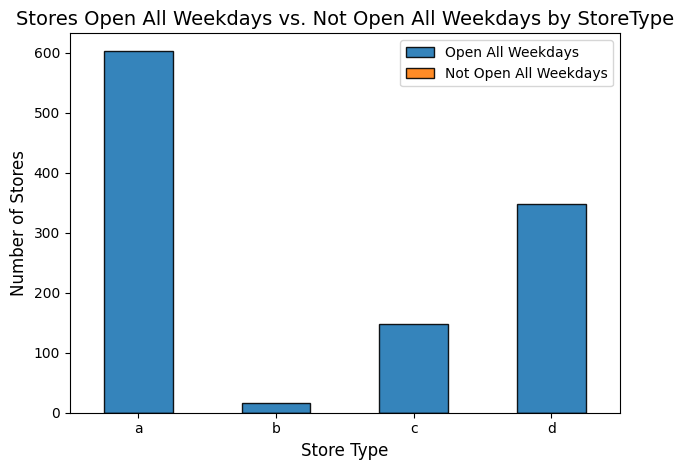

In [91]:
from scripts.feature_engineering import storesOpenAllWeekdays
storesOpenAllWeekdays(merged_train_data_store)


### Stores open weekdays How does that affect their sales on weekends


This function compares the weekend sales performance between stores that are open all weekdays (Monday through Friday) and stores that are not

2024-09-23 19:13:09,583 - INFO - Starting storesOpenWeekdayOpenWeekends function
2024-09-23 19:13:09,583 - INFO - Starting storesOpenWeekdayOpenWeekends function
2024-09-23 19:13:09,933 - INFO - Filtered open stores: 844392 entries
2024-09-23 19:13:09,933 - INFO - Filtered open stores: 844392 entries
2024-09-23 19:13:10,296 - INFO - Number of stores open all weekdays: 1115
2024-09-23 19:13:10,296 - INFO - Number of stores open all weekdays: 1115
2024-09-23 19:13:10,620 - INFO - Average weekend sales for stores open all weekdays: 2994.451143510152
2024-09-23 19:13:10,620 - INFO - Average weekend sales for stores open all weekdays: 2994.451143510152
2024-09-23 19:13:10,622 - INFO - Average weekend sales for stores NOT open all weekdays: nan
2024-09-23 19:13:10,622 - INFO - Average weekend sales for stores NOT open all weekdays: nan


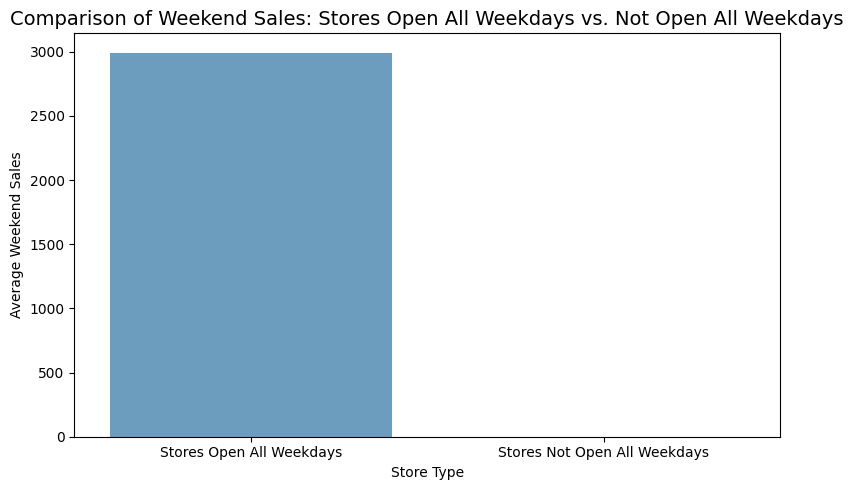

2024-09-23 19:13:10,947 - INFO - Completed storesOpenWeekdayOpenWeekends function
2024-09-23 19:13:10,947 - INFO - Completed storesOpenWeekdayOpenWeekends function


In [92]:
from scripts.feature_engineering import storesOpenWeekdayOpenWeekends
storesOpenWeekdayOpenWeekends(merged_train_data_store)


# Prediction of store sales

## Preprocessing

### Load the training and test data

In [93]:
train_data = pd.merge(train_data, store_data, on='Store', how='inner')
test_data = pd.merge(test_data, store_data, on='Store', how='inner')


Our dataset of stateHoliday columns have 0(int) and 0(str) so we have to convert into the same type 
for easly access

In [94]:
def replace_0_state_holiday(char):
    if char == 0:
        return '0'
    else:
        return char
train_data['StateHoliday'] = train_data['StateHoliday'].apply(replace_0_state_holiday)
test_data['StateHoliday'] = test_data['StateHoliday'].apply(replace_0_state_holiday)


In [95]:
train_data.head(10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263.0,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064.0,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314.0,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995.0,1485,1,1,0,1,c,c,620.0,9.0,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822.0,559,1,1,0,1,a,a,16182.5,4.0,2015.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
5,6,5,2015-07-31,5651.0,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
6,7,5,2015-07-31,14049.5,1414,1,1,0,1,a,c,16182.5,4.0,2013.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
7,8,5,2015-07-31,8492.0,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
8,9,5,2015-07-31,8565.0,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
9,10,5,2015-07-31,7185.0,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"


#### Create all the date features from our date columns

In [96]:
train_data=create_date_features(train_data)


2024-09-23 19:13:11,646 - INFO - Creating date features.
2024-09-23 19:13:11,646 - INFO - Creating date features.


In [97]:
train_data.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'IsWeekend'],
      dtype='object')

In [98]:
test_data.head(10)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,16182.5,4.0,2013.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
5,6,10,4,2015-09-17,1.0,1,0,0,a,a,3160.0,9.0,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct"
6,7,11,4,2015-09-17,1.0,1,0,0,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
7,8,12,4,2015-09-17,1.0,1,0,0,a,c,1070.0,12.0,2015.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
8,9,13,4,2015-09-17,1.0,1,0,0,d,a,310.0,12.0,2015.0,1,45.0,2009.0,"Feb,May,Aug,Nov"
9,10,14,4,2015-09-17,1.0,1,0,0,a,a,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"


#### Create all date features from date column for test dataset

In [99]:
test_data=create_date_features(test_data)


2024-09-23 19:13:13,140 - INFO - Creating date features.
2024-09-23 19:13:13,140 - INFO - Creating date features.


In [100]:
test_data.head(10)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,IsWeekend
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,2008.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2015,9,17,38,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,2013.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2015,9,17,38,0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,2014.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2015,9,17,38,0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,2000.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2015,9,17,38,0
5,6,10,4,2015-09-17,1.0,1,0,0,a,a,...,2009.0,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2015,9,17,38,0
6,7,11,4,2015-09-17,1.0,1,0,0,a,c,...,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2015,9,17,38,0
7,8,12,4,2015-09-17,1.0,1,0,0,a,c,...,2015.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,9,17,38,0
8,9,13,4,2015-09-17,1.0,1,0,0,d,a,...,2015.0,1,45.0,2009.0,"Feb,May,Aug,Nov",2015,9,17,38,0
9,10,14,4,2015-09-17,1.0,1,0,0,a,a,...,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,0


#### Check missing columns in Test data

In [101]:
missing_cols_in_test = set(train_data.columns) - set(test_data.columns)


In [102]:
print(missing_cols_in_test)


{'Customers', 'Sales'}


In [103]:
train_data = train_data.drop(columns='Customers')


In [104]:
missing_cols_in_test = set(train_data.columns) - set(test_data.columns)
print(missing_cols_in_test)


{'Sales'}


In [105]:
merged_train_data_store.columns


Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'IsWeekend', 'HolidayPeriod_Public Holiday',
       'AfterHoliday_Public Holiday', 'BeforeHoliday_Public Holiday',
       'SalesPeriod_Public Holiday', 'HolidayPeriod_Easter Holiday',
       'AfterHoliday_Easter Holiday', 'BeforeHoliday_Easter Holiday',
       'SalesPeriod_Easter Holiday', 'HolidayPeriod_Christmas',
       'AfterHoliday_Christmas', 'BeforeHoliday_Christmas',
       'SalesPeriod_Christmas', 'Season', 'SalesGrowthRate',
       'CompetitionDistanceInterval'],
      dtype='object')

In [106]:
missing_cols_in_train = set(test_data.columns) - set(train_data.columns)
print(missing_cols_in_train)


{'Id'}


In [107]:
test_data = test_data.drop(columns='Id')


In [108]:
missing_cols_in_train = set(test_data.columns) - set(train_data.columns)
print(missing_cols_in_train)


set()


Beginning of the month, mid-month, and end of the month

In [109]:
from scripts.feature_engineering import month_period

train_data['MonthPeriod'] = train_data['Date'].dt.day.apply(month_period)
test_data['MonthPeriod'] = test_data['Date'].dt.day.apply(month_period)



In [110]:
train_data.tail()


,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,IsWeekend,MonthPeriod
1017204,1111,2,2013-01-01,0.0,0,0,a,1,a,a,...,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0,beginning
1017205,1112,2,2013-01-01,0.0,0,0,a,1,c,c,...,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0,beginning
1017206,1113,2,2013-01-01,0.0,0,0,a,1,a,c,...,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0,beginning
1017207,1114,2,2013-01-01,0.0,0,0,a,1,a,c,...,0,50.0,2015.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0,beginning
1017208,1115,2,2013-01-01,0.0,0,0,a,1,d,c,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,1,0,beginning


In [111]:
import pandas as pd
import numpy as np


train_data['Date'] = pd.to_datetime(train_data['Date'])

# Extract holiday dates where 'StateHoliday' is a holiday ('a', 'b', 'c' indicate holidays)
holiday_dates = train_data[train_data['StateHoliday'].isin(['a', 'b', 'c'])]['Date'].unique()

# Sort the holiday dates
holiday_dates = np.sort(holiday_dates)
print(holiday_dates)


['2013-01-01T00:00:00.000000000' '2013-01-06T00:00:00.000000000'
 '2013-03-29T00:00:00.000000000' '2013-04-01T00:00:00.000000000'
 '2013-05-01T00:00:00.000000000' '2013-05-09T00:00:00.000000000'
 '2013-05-20T00:00:00.000000000' '2013-05-30T00:00:00.000000000'
 '2013-08-15T00:00:00.000000000' '2013-10-03T00:00:00.000000000'
 '2013-10-31T00:00:00.000000000' '2013-11-01T00:00:00.000000000'
 '2013-11-20T00:00:00.000000000' '2013-12-25T00:00:00.000000000'
 '2013-12-26T00:00:00.000000000' '2014-01-01T00:00:00.000000000'
 '2014-01-06T00:00:00.000000000' '2014-04-18T00:00:00.000000000'
 '2014-04-21T00:00:00.000000000' '2014-05-01T00:00:00.000000000'
 '2014-05-29T00:00:00.000000000' '2014-06-09T00:00:00.000000000'
 '2014-06-19T00:00:00.000000000' '2014-10-03T00:00:00.000000000'
 '2014-10-31T00:00:00.000000000' '2014-11-01T00:00:00.000000000'
 '2014-11-19T00:00:00.000000000' '2014-12-25T00:00:00.000000000'
 '2014-12-26T00:00:00.000000000' '2015-01-01T00:00:00.000000000'
 '2015-01-06T00:00:00.000

### Calculate the days to the nearest future or past holiday for a specific holiday type

### Split holiday types 'a', 'b', 'c' into separate lists

In [112]:

from scripts.feature_engineering import splitHolidayTypeToLists
holiday_a_dates_train, holiday_b_dates_train, holiday_c_dates_train = splitHolidayTypeToLists(train_data)
holiday_a_dates_test, holiday_b_dates_test, holiday_c_dates_test = splitHolidayTypeToLists(test_data)


In [113]:
from scripts.feature_engineering import assign_days_to_and_after_holiday


In [114]:

train_data= assign_days_to_and_after_holiday(train_data,holiday_a_dates_train, holiday_b_dates_train, holiday_c_dates_train)


In [115]:
test_data=assign_days_to_and_after_holiday(test_data,holiday_a_dates_test, holiday_b_dates_test, holiday_c_dates_test)
    


In [116]:
# Display the new columns of trainig datasets
print(train_data[['Date', 'StateHoliday', 'DaysTo_A_Holiday', 'DaysTo_B_Holiday', 'DaysTo_C_Holiday', 
                               'DaysAfter_A_Holiday', 'DaysAfter_B_Holiday', 'DaysAfter_C_Holiday']])


              Date StateHoliday  DaysTo_A_Holiday  DaysTo_B_Holiday  \
0       2015-07-31            0                -1                -1   
1       2015-07-31            0                -1                -1   
2       2015-07-31            0                -1                -1   
3       2015-07-31            0                -1                -1   
4       2015-07-31            0                -1                -1   
...            ...          ...               ...               ...   
1017204 2013-01-01            a                 0                87   
1017205 2013-01-01            a                 0                87   
1017206 2013-01-01            a                 0                87   
1017207 2013-01-01            a                 0                87   
1017208 2013-01-01            a                 0                87   

         DaysTo_C_Holiday  DaysAfter_A_Holiday  DaysAfter_B_Holiday  \
0                      -1                   57                  116   
1    

In [117]:
train_data.head()


,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Day,WeekOfYear,IsWeekend,MonthPeriod,DaysTo_A_Holiday,DaysTo_B_Holiday,DaysTo_C_Holiday,DaysAfter_A_Holiday,DaysAfter_B_Holiday,DaysAfter_C_Holiday
0,1,5,2015-07-31,5263.0,1,1,0,1,c,a,...,31,31,1,end,-1,-1,-1,57,116,217
1,2,5,2015-07-31,6064.0,1,1,0,1,a,a,...,31,31,1,end,-1,-1,-1,57,116,217
2,3,5,2015-07-31,8314.0,1,1,0,1,a,a,...,31,31,1,end,-1,-1,-1,57,116,217
3,4,5,2015-07-31,13995.0,1,1,0,1,c,c,...,31,31,1,end,-1,-1,-1,57,116,217
4,5,5,2015-07-31,4822.0,1,1,0,1,a,a,...,31,31,1,end,-1,-1,-1,57,116,217


In [118]:
# Display the new columns of test datasets
print(test_data[['Date', 'StateHoliday', 'DaysTo_A_Holiday', 'DaysTo_B_Holiday', 'DaysTo_C_Holiday', 
                               'DaysAfter_A_Holiday', 'DaysAfter_B_Holiday', 'DaysAfter_C_Holiday']])


            Date StateHoliday  DaysTo_A_Holiday  DaysTo_B_Holiday  \
0     2015-09-17            0                -1                 0   
1     2015-09-17            0                -1                 0   
2     2015-09-17            0                -1                 0   
3     2015-09-17            0                -1                 0   
4     2015-09-17            0                -1                 0   
...          ...          ...               ...               ...   
41083 2015-08-01            0                14                 0   
41084 2015-08-01            0                14                 0   
41085 2015-08-01            0                14                 0   
41086 2015-08-01            0                14                 0   
41087 2015-08-01            0                14                 0   

       DaysTo_C_Holiday  DaysAfter_A_Holiday  DaysAfter_B_Holiday  \
0                     0                   33                    0   
1                     0          

In [119]:
test_data.head()


,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Day,WeekOfYear,IsWeekend,MonthPeriod,DaysTo_A_Holiday,DaysTo_B_Holiday,DaysTo_C_Holiday,DaysAfter_A_Holiday,DaysAfter_B_Holiday,DaysAfter_C_Holiday
0,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,...,17,38,0,middle,-1,0,0,33,0,0
1,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,...,17,38,0,middle,-1,0,0,33,0,0
2,7,4,2015-09-17,1.0,1,0,0,a,c,16182.5,...,17,38,0,middle,-1,0,0,33,0,0
3,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,...,17,38,0,middle,-1,0,0,33,0,0
4,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,...,17,38,0,middle,-1,0,0,33,0,0


In [120]:
train_data = train_data.drop('Date',axis=1)
test_data = test_data.drop('Date',axis=1)


In [121]:
train_data.columns


Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'WeekOfYear', 'IsWeekend', 'MonthPeriod', 'DaysTo_A_Holiday',
       'DaysTo_B_Holiday', 'DaysTo_C_Holiday', 'DaysAfter_A_Holiday',
       'DaysAfter_B_Holiday', 'DaysAfter_C_Holiday'],
      dtype='object')

In [122]:
test_data['MonthPeriod']



0           middle
1           middle
2           middle
3           middle
4           middle
           ...    
41083    beginning
41084    beginning
41085    beginning
41086    beginning
41087    beginning
Name: MonthPeriod, Length: 41088, dtype: object

In [123]:
train_data.columns


Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day', 'WeekOfYear', 'IsWeekend', 'MonthPeriod', 'DaysTo_A_Holiday',
       'DaysTo_B_Holiday', 'DaysTo_C_Holiday', 'DaysAfter_A_Holiday',
       'DaysAfter_B_Holiday', 'DaysAfter_C_Holiday'],
      dtype='object')

In [124]:
train_data2 = train_data.drop('Sales', axis=1)


In [125]:
test_data.columns == train_data2.columns


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

## Get pre-processed Data

In [126]:
from scripts.feature_engineering import get_preprocessed_test_data

test_data_preprocessed_df = get_preprocessed_test_data(test_data)


In [127]:
from  scripts.feature_engineering import get_preprocessed_train_data
train_data_preprocessed_df = get_preprocessed_train_data(train_data)


In [128]:
train_data_preprocessed_df.head()


,Sales,Store,DayOfWeek,DaysTo_A_Holiday,SchoolHoliday,DaysAfter_A_Holiday,DaysTo_B_Holiday,DaysAfter_B_Holiday,DaysTo_C_Holiday,DaysAfter_C_Holiday,...,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",MonthPeriod_beginning,MonthPeriod_end,MonthPeriod_middle
0,-0.118975,-1.731640,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.103784,-1.728534,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.729513,-1.725427,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2.309409,-1.722321,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.241618,-1.719214,0.501484,-0.6222,2.144211,0.607962,-0.71979,-0.281663,-0.807305,1.217594,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [129]:
test_data_preprocessed_df.head()


,Store,DayOfWeek,DaysTo_A_Holiday,SchoolHoliday,DaysAfter_A_Holiday,DaysTo_B_Holiday,DaysAfter_B_Holiday,DaysTo_C_Holiday,DaysAfter_C_Holiday,Open,...,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",MonthPeriod_beginning,MonthPeriod_end,MonthPeriod_middle
0,-1.732596,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412874,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.726351,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412874,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.713862,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412874,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.710739,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412874,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.707617,0.010337,-0.564933,-0.892695,1.910662,0.0,0.0,0.0,0.0,0.412874,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [130]:
from scripts.ml_model import train_ml_model


In [131]:
missing_cols = set(train_data_preprocessed_df.columns) - set(test_data_preprocessed_df.columns)


In [132]:
print(missing_cols)


{'StateHoliday_c', 'StateHoliday_b', 'Sales'}


In [133]:
pipeline,X_train,y_train =train_ml_model(train_data_preprocessed_df)


Validation RMSE: 0.41121760601478236
Validation MAE: 0.4545995940597235


Test using Test data

In [134]:
for col in ['StateHoliday_b','StateHoliday_c']:
        test_data_preprocessed_df[col] = 0


In [135]:
test_data_preprocessed_df = test_data_preprocessed_df[train_data_preprocessed_df.columns]


In [136]:
y_test_perd = pipeline.predict(test_data_preprocessed_df)


In [137]:
print(pd.DataFrame(y_test_perd))


              0
0      0.661348
1      0.661348
2      0.661348
3      0.661348
4      0.661348
...         ...
41083  0.052088
41084  0.052088
41085  0.052088
41086  0.052088
41087  0.052088

[41088 rows x 1 columns]


# Post Prediction Analysis

### Feature Importance

In [138]:
from scripts.ml_model import post_prediction_feature_importance
   

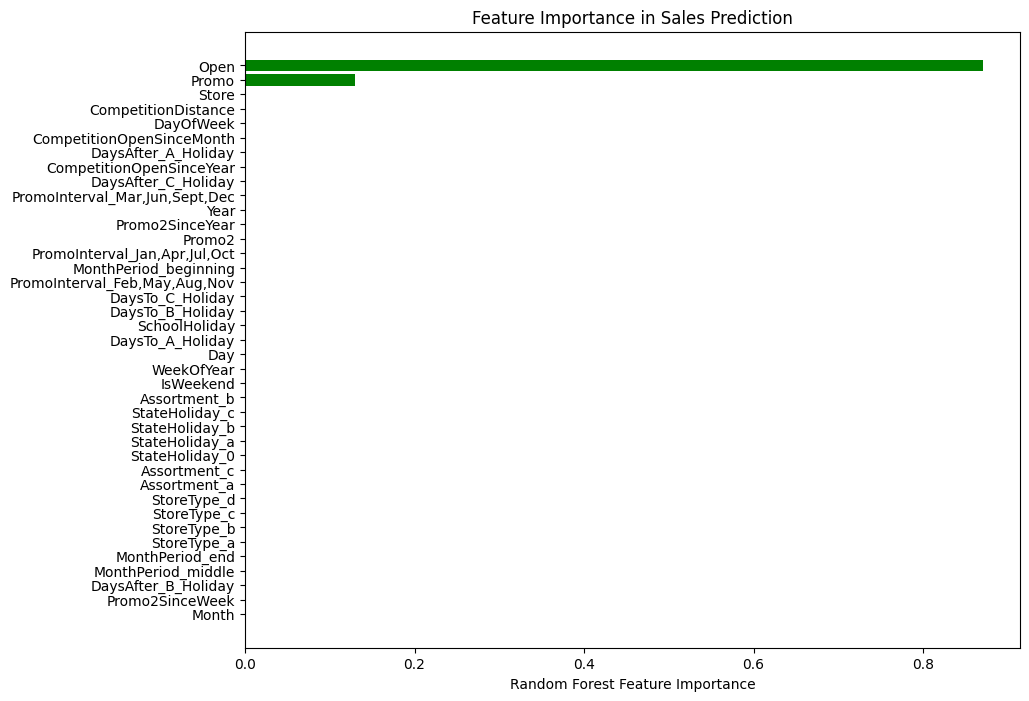

In [139]:
post_prediction_feature_importance(pipeline,train_data_preprocessed_df)


In [140]:
from scripts.ml_model import post_prediction_confidence_interval


In [141]:
lower_and_upper_bound =post_prediction_confidence_interval(pipeline, train_data_preprocessed_df)


In [142]:
print(lower_and_upper_bound)


         Lower Bound  Upper Bound
0           0.658981     0.663715
1           0.658981     0.663715
2           0.658981     0.663715
3           0.658981     0.663715
4           0.658981     0.663715
...              ...          ...
1017204    -1.582625    -1.582625
1017205    -1.582625    -1.582625
1017206    -1.582625    -1.582625
1017207    -1.582625    -1.582625
1017208    -1.582625    -1.582625

[1017209 rows x 2 columns]


# Serialize Models

### It is essential to save the trained model with a timestamp for reproducibility and tracking.



In [143]:
from scripts.ml_model import save_model



In [144]:
save_model(pipeline,'models')


Model saved at models/model-2024-09-23-19-24-48.pkl


# Building a Deep Learning Model (LSTM)

In [145]:
from scripts.deep_learning_model import prepare_lstm_data,train_lstm_model


2024-09-23 19:24:50.971539: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 19:24:51.302539: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-23 19:24:51.571894: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 19:24:53.222963: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-23 19:24:53.307528: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-23 19:24:53.968936: I tensorflow/core/platform/cpu_feature_gu

In [146]:

window_size = 60  # Using 60 days to predict the next day's sales

# Prepare the data (using 'Sales' as the target column)
X, y, scaler = prepare_lstm_data(train_data, target_col='Sales', window_size=window_size)



# Train the LSTM model
input_shape = (X_train.shape[1], 1)  # (window_size, 1)
lstm_model = train_lstm_model(X_train, y_train, input_shape)


2024-09-23 19:25:13.878025: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 158684604 exceeds 10% of free system memory.


Epoch 1/2
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 579s 35ms/step - loss: 0.4341
Epoch 2/2
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 592s 37ms/step - loss: 0.3112


In [147]:
# Making predictions on the validation set
predictions = lstm_model.predict(X_train)

# Inverse transform the predictions and actual values to get them back to the original scale
predictions_rescaled = scaler.inverse_transform(predictions)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train, predictions_rescaled))
print(f"Validation RMSE: {rmse}")



2024-09-23 19:45:04.842702: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 158684604 exceeds 10% of free system memory.


31788/31788 ━━━━━━━━━━━━━━━━━━━━ 422s 13ms/step
Validation RMSE: 9482.405063672402


In [148]:
lstm_model.save('models/lstm_sales_model.h5')


2024-09-23 19:52:38,445 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 
2024-09-23 19:52:38,445 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 
